**Анализ оттока клиентов банка "Метанпром"**

**Материалы**


<a class="dashboard-link" href="https://drive.google.com/file/d/1TUJdFgfrkPeNuhKhjVRnyPM3Mfm5gkbr/view?usp=drive_link">Презентация</a>



<a class="dashboard-link" href="https://public.tableau.com/app/profile/natalia.shapkina/viz/Metaprombank_16843421743340/sheet2?publish=yes">Дашборд</a>

**Описание исследования**

Банк "Метанпром" располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. В последнее время отток клиентов увеличился, при этом удерживать клиентов дешевле, чем привлекать новых 

**Заказчик исследования**

Отдел маркетинга банка "Метанпром"


**Цель исследования**

Выявить клиентов банка, наиболее склонных к оттоку, и предложить меры по его снижению

**Задачи исследования**

1. **<a href='#info'> Загрузка данных и изучение общей информации </a>**
    
    1.1. <a href='#libr'> Загрузка библиотек </a> 
    
    1.2. <a href='#df'> Загрузка датасета и общая информация о данных </a> 
    
    1.3. <a href='#unique'> Изучение уникальных значений столбцов </a> 

2. **<a href='#data'> Предобработка данных </a>**
 
    2.1. <a href='#type'> Изменение типов данных </a> 

    2.2. <a href='#rename'> Переименование столбцов </a> 
    
    2.3. <a href='#dupl'> Поиск явных дубликатов </a> 
    
    2.4 <a href='#impl_dupl'> Поиск неявных дубликатов </a>
    
    2.5. <a href='#nan'> Обработка пропусков  </a>
    
    2.6. <a href='#codes'> Кодирование данных для поиска корреляции</a>

3. **<a href='#analysis'> Исследовательский анализ данных (EDA)</a>**

3.1. <a href='#param'> Анализ распределения клиентов по параметрам (город, пол, возраст и т.п.)</a>
    
    

3.2. <a href='#portr'>Анализ портретов клиентов, склонных к оттоку</a>
    
    

3.3. <a href='#corr'>Корреляционный анализ параметров клиентов и оттока</a>
    
    

4. **<a href='#hipo'> Проверка статистических гипотез  </a>**

5. **<a href='#segm'> Сегментация и портрет клиентов, склонных к оттоку </a>** 

6. **<a href='#concl'> Итоговые выводы и рекомендации </a>**

**Описание данных**

В нашем распоряжении датасет с информацией о клиентах банка:


- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity`  — количество баллов собственности
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `EST_SALARY` — заработная плата клиента,
- `churn` — ушёл или нет

## Загрузка данных и изучение общей информации
<a id='info'></a>

### Загрузка библиотек
<a id='libr'></a>

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st 

# для построения интерактивных графиков
import plotly.express as px
from plotly import graph_objects as go

# для корреляционного анализа
import phik

###  Загрузка датасета и общая информация о данных
<a id='df'></a>

Загрузим датасет для работы и отобразим несколько строк таблицы для превичного ознакомления:

In [3]:
local = 'bank_scrooge.csv'
google = 'https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F'

if os.path.exists(local):
    df = pd.read_csv(local)
else:
    response = requests.get(google)
    
    """ Проверяем статусный код ответа.
        Если код равен 200 (успешный запрос), 
        сохраняем содержимое файла в локальный файл bank_scrooge.csv
    """
    if response.status_code == 200:
        with open(local, 'wb') as file:
            file.write(response.content)
        df = pd.read_csv(local)
    else:
        '''
        Если URL недействительный или происходит ошибка при загрузке файла,
        выводится сообщение об ошибке.
        '''
        print('Неправильный путь к датасету')        

In [4]:
print('В датасете', df.shape[0], 'строк и', df.shape[1], 'cтолбцов')

В датасете 10000 строк и 12 cтолбцов


Изучим типы данных в столбцах:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


**Выводы:**

В датасете три типа данных:

1. Текстовые (*object*): столбцы`city` и `gender`, что корректно для пола клиентов и города отделения банка
2. Целочисленные (*int64*): столбцы `USERID`, `equity`, `products`, `credit_card`, `last_activity`, `churn`, что также корректно, так как по описанию датасета это либо целые числа определенного диапазона, либо бинарная кодировка (`credit_card`, `last_activity`, `churn)
3. Числа с плавающей запятой (*float64*): столбцы `score`, `age`, `balance`, `EST_SALARY`. Отметим, что тип первых двух столбцов `score` и `age`, возможно, лучше поменять на целочисленный для экономии вычислительных мощностей. Рассмотрим это ниже в предобработке данных.

### Изучение уникальных значений столбцов
<a id='unique'></a>

In [6]:
df.describe()

USERID         score          age        equity       balance  \
count   10000.00000  10000.000000  9974.000000  10000.000000  7.705000e+03   
mean   171814.71260    848.699400    42.734409      2.627600  8.277943e+05   
std     33708.23812     65.448519    12.179971      1.980836  1.980614e+06   
min     94561.00000    642.000000    18.000000      0.000000  0.000000e+00   
25%    142810.25000    802.000000    33.000000      0.000000  2.955542e+05   
50%    172728.00000    853.000000    40.000000      3.000000  5.242722e+05   
75%    201261.75000    900.000000    51.000000      4.000000  9.807058e+05   
max    229145.00000   1000.000000    86.000000      9.000000  1.191136e+08   

           products   credit_card  last_activity    EST_SALARY         churn  
count  10000.000000  10000.000000   10000.000000  1.000000e+04  10000.000000  
mean       1.870100      0.680400       0.523500  1.478669e+05      0.182000  
std        0.792647      0.466345       0.499472  1.393885e+05      0.385864  
min        0.000000      0.000000       0.000000  2.546300e+03      0.000000  
25%        1.000000      0.000000       0.000000  7.525190e+04      0.000000  
50%        2.000000      1.000000       1.000000  1.196581e+05      0.000000  
75%        2.000000      1.000000       1.000000  1.745005e+05      0.000000  
max        5.000000      1.000000       1.000000  1.395064e+06      1.000000

In [7]:
for c in df.columns:
    print('Столбец', c)
    print('Список уникальных значений:',df[c].unique())
    print('Всего уникальных значений:', df[c].nunique())
    print()

Столбец USERID
Список уникальных значений: [183012 146556 120722 ... 115639 148700  96267]
Всего уникальных значений: 9927

Столбец score
Список уникальных значений: [ 850.  861.  892.  866.  730.  856.  807.  825.  923.  906.  927.  921.
  845.  837.  815.  731.  829.  793.  876.  922.  772.  896.  871.  732.
  898.  806.  766.  776.  868.  946.  828.  786.  944.  863.  822.  794.
  924.  811.  814.  956.  935.  826.  849.  901.  893.  792.  888.  831.
  748.  820.  860.  914.  930.  948.  789.  737.  812.  933.  809.  749.
  873.  859.  950.  937.  835.  768.  767.  785.  846.  750.  816.  894.
  891.  788.  758.  787.  821.  855.  779.  791.  838.  971.  797.  841.
  915.  985.  870.  897.  763.  774.  686. 1000.  875.  819.  869.  854.
  810.  761.  802.  958.  917.  745.  736.  908.  928.  884.  853.  780.
  726.  881.  975.  852.  965.  899.  890.  836.  818.  880.  795.  916.
  775.  902.  918.  842.  771.  895.  801.  721.  966.  804.  885.  986.
  753.  832.  979.  798.  754. 

**Выводы:**

1. В столбце `USERID` 9 927 уникальных значений при общем количестве заполненных строк в столбце 10 000. Это значит, что есть дубликаты, которые рассмотрим ниже. Сами значения столбца вопросов не вызывают

2. В столбце `score` все значения целочисленные от 652 до 1000 баллов. С одной стороны, мы не знаем, как строится кредитный скоринг в банке, с другой стороны, в данном датасете все баллы представлены целым числом. Изменим формат данных

3. В столбце `city` всего три города: Ярославль, Рыбинск, Ростов, как и положено. Данные корректны

4. В столбце `gender` два пола: М и Ж, что корректно

5. В столбце `age` 68 целочисленных значения от 18 до 86 лет, что в рамках разумного (совершеннолетние клиенты реального возраста). Изменим формат данных

6. Столбец `equity` содержит целочисленные баллы от 0 до 9. Данные корректны

7. Столбец `balance` имеет множество значений с плавающей запятой, а также пропусков. Обработкой столбца займёмся ниже

8. Столбец `products` принимает целочисленные значения от 0 до 5, что вполне реалистично для количества банковских продуктов, однако надо обратить внимание на клиентов с нулевым количеством продуктов

9. Столбцы `credit_card`,`last_activity` и `churn` содержат только 2 значения '0' или '1', что корректно: кредитная карта, активность и отток либо имеются, либо не имеются

10. Столбец `EST_SALARY` имеет 9 996 уникальных значений с плавающей запятой, что выглядит корректно. Ниже посмотрим на дубликаты в зарплате, но скорее всего это нормально



## Предобработка данных
<a id='data'></a>

### Изменение типов данных
<a id='type'></a>

Изменим тип данных у столбцов `age` с возрастом и `score`с баллами кредитного скоринга на целочисленный:

In [8]:
df['age'] = pd.array(df['age'], dtype=pd.Int64Dtype())
df['score'] = pd.array(df['score'], dtype=pd.Int64Dtype())

### Переименование столбцов
<a id='rename'></a>

Не все столбцы датасета имеют красивые названия, соответствующие snake case и нижнему регистру. Исправим это:

In [9]:
# приведём названия к нижнему регистру
df.columns = map(str.lower, df.columns)

# дадим столбцу легко читаемое название
df = df.rename(columns={"userid": "user_id"})

### Поиск явных дубликатов
<a id='dupl'></a>

In [10]:
print('В датасете', df.duplicated().sum(), 'явных дубликатов')

В датасете 0 явных дубликатов


### Поиск неявных дубликатов
<a id='impl_dupl'></a>

При изучении информации мы заметили, что количество уникальных user_id меньше, чем количество заполненных строк в столбце, значит столбец содержит дубликаты, что вызывает вопросы.

Рассмотрим эти дубликаты:

In [11]:
print('В датасете',df['user_id'].duplicated().sum(), 'дублирующихся идентификаторов пользователей')

В датасете 73 дублирующихся идентификаторов пользователей


In [12]:
id_dupl = df[df['user_id'].duplicated()]['user_id'].unique()
df[df['user_id'].isin(id_dupl)].sort_values('user_id').head(16)

user_id  score       city gender   age  equity     balance  products  \
1893   116540    883    Рыбинск      Ж    55       1   362756.49         3   
7694   116540    887  Ярославль      Ж    38       0         NaN         1   
7542   117943    880  Ярославль      Ж    40       0         NaN         1   
4866   117943    855    Рыбинск      Ж    32       6  1036832.93         4   
5896   120258    905  Ярославль      М    30       0         NaN         1   
5863   120258    908    Рыбинск      Ж    38       4  2213581.63         2   
1411   123461    829  Ярославль      Ж    59       0    96222.44         2   
8638   123461    934    Рыбинск      М    34       0         NaN         2   
8164   124450    859  Ярославль      Ж    38       6   516811.20         1   
9775   124450    758    Рыбинск      Ж    36       0    73574.07         2   
4850   126368    909  Ярославль      Ж    30       4  1322623.29         2   
5420   126368    832    Рыбинск      Ж    33       0         NaN         1   
8785   127440    663  Ярославль      М  <NA>       0         NaN         1   
4443   127440    846    Рыбинск      М    66       1    57405.67         2   
3988   129785    904    Рыбинск      М    33       5  2427737.60         3   
9504   129785    949  Ярославль      М    43       0         NaN         1   

      credit_card  last_activity  est_salary  churn  
1893            0              1   175920.48      1  
7694            0              1   119247.61      0  
7542            1              0   137718.93      0  
4866            1              1   107792.71      1  
5896            1              1   146427.96      0  
5863            0              1   160327.77      1  
1411            0              1   102771.55      1  
8638            1              0   291619.27      0  
8164            1              1    95144.63      1  
9775            0              1    79963.59      0  
4850            0              1   140675.66      1  
5420            0              0   118465.34      0  
8785            1              1   117197.56      0  
4443            0              1    17831.63      0  
3988            0              1   188856.75      1  
9504            1              1   166845.37      0

Мы могли бы предположить, что такое задвоение - это результат обращения  и регистрации одного и того же клиента в двух разных филиалах банка, однако это люди разного возраста и пола. Другие данные по балансу, оттоку и т.п. также не совпадают. Оставим эти дубликаты, так как при группировке данных функцией count это не будет искажать данные.

Сами дубликаты и формулировку проблемы отправим в IT для выяснения причин таких повторов уникальный идентификаторов.

Посмотрим на дубликаты в столбце `est_salary`:

In [13]:
print('В датасете',df['est_salary'].duplicated().sum(), 'дублирующихся значений зарплаты')

В датасете 4 дублирующихся значений зарплаты


In [14]:
sal_dupl = df[df['est_salary'].duplicated()]['est_salary'].unique()
df[df['est_salary'].isin(sal_dupl)].sort_values('est_salary')

user_id  score       city gender   age  equity    balance  products  \
513    120675    832    Рыбинск      Ж    37       2  430220.82         2   
2442   152240    861     Ростов      Ж    60       3  599546.80         2   
4642   133759    831  Ярославль      М    50       5  560145.71         2   
6050   202056    979    Рыбинск      Ж    30       2  820572.71         3   
884    214629    772  Ярославль      М    53       2  335295.37         2   
8376   217828    947  Ярославль      М    30       5  393215.11         1   
4343   141945    929    Рыбинск      М    33       0        NaN         1   
9457   141945    929  Ярославль      М  <NA>       0        NaN         1   

      credit_card  last_activity  est_salary  churn  
513             1              1    49742.87      0  
2442            0              1    49742.87      0  
4642            1              1   108250.17      0  
6050            1              0   108250.17      0  
884             1              1   176348.18      0  
8376            1              0   176348.18      0  
4343            1              0   381868.89      0  
9457            1              0   381868.89      0

Мы видим, что это совершенно разные люди. Проблем нет, просто зарплата совпала с точностью до сотых значений.

### Обработка пропусков
<a id='nan'></a>

Посмотрим, какое соотношение пропусков к данным в столбцах датасета:

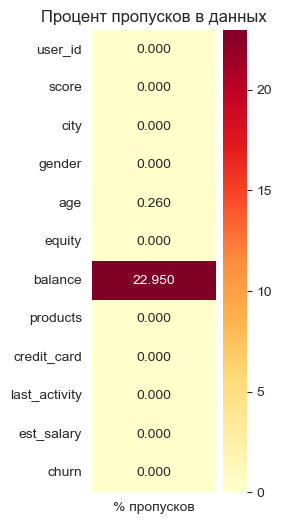

In [15]:
t = round(df.isna().mean() * 100, 2)
sns.set_style('whitegrid')
plt.figure(figsize=(2,6))
sns.heatmap(pd.DataFrame(t, columns=['% пропусков']), cmap='YlOrRd', annot=True, fmt='.3f')
plt.title('Процент пропусков в данных')
plt.show()

Пропуски есть всего в двух столбцах: 
1. `balance` - почти 23% значений пропущено
2. `age` - незначительное количество пропусков около 0.3% данных

Рассмотрим пропуски в столбце `balance` в соответствии с общепринятой классификацией пропусков.
Судя по распределению пропусков по параметрам `score`, `gender` и `products` пропуски относятся к типу *MNAR (Missing Not At Random / Отсутствует не случайно)*:
- по кредитному скорингу у пользователей с низкими баллами (до 750) почти сплошные пропуски по баллансу. Возможно, это означает нулевой баланс. Также отмечается много пропусков у другого полюса клиентов - с высоким рейтингом (900-950 баллов). Возможно, здесь уже идёт осознанное сокрытие информации. Но без знания технических деталей мы не можем делать никаких выводов.
- с точки зрения половой принадлежности больше пропусков баланса у мужчин
- пропуски в основном у тех, кто пользуется 1-2 продуктами банка

Это значит, что пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям. 

Ниже проверим ещё степень корреляции количества пропусков с другими данными, чтобы обосновать невозможность их корректного заполнения одним или несколькими значениями.

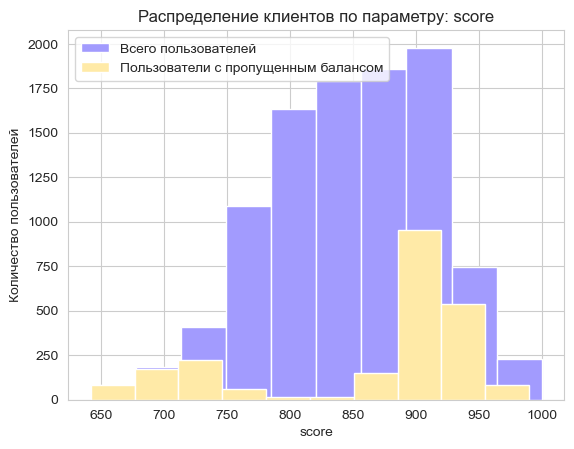

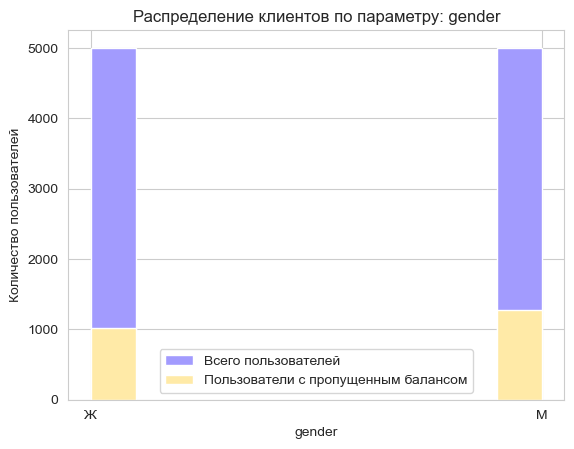

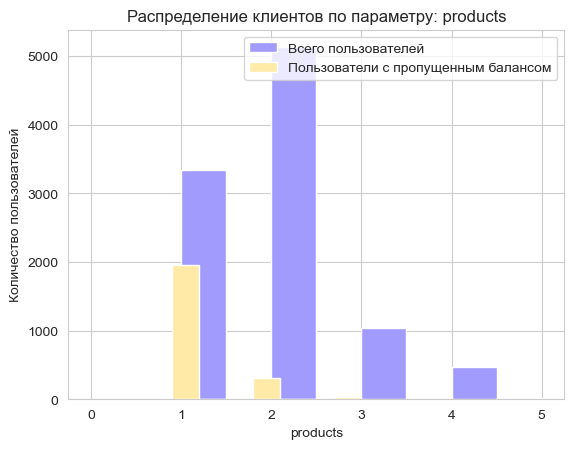

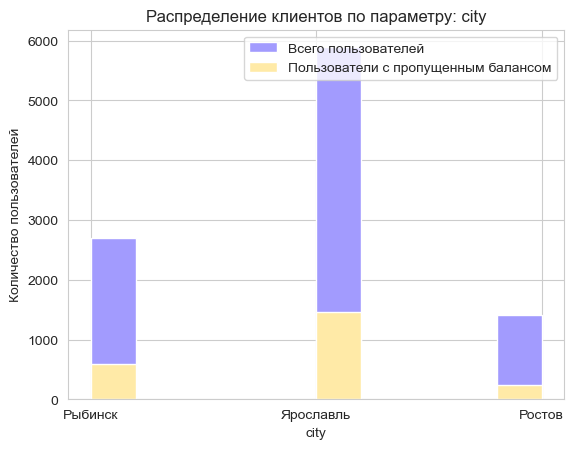

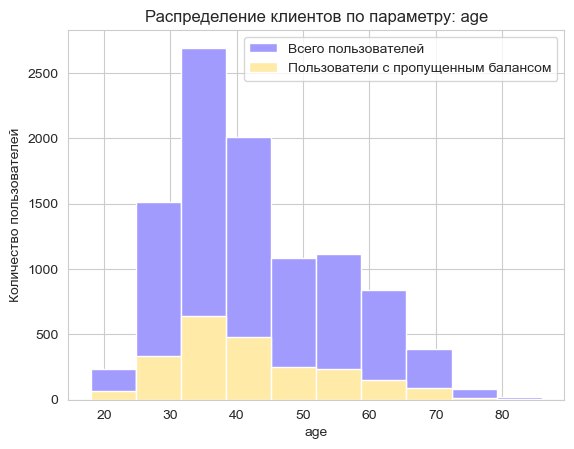

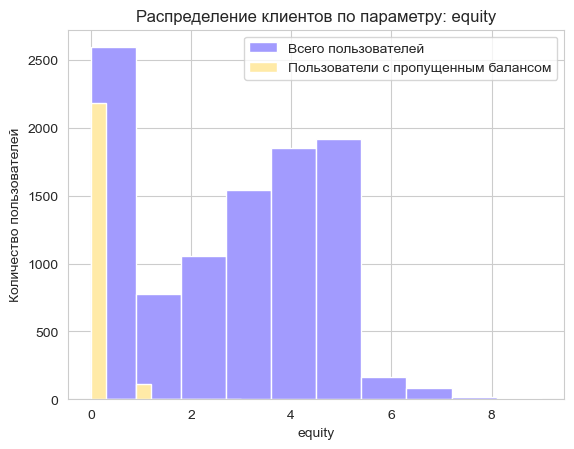

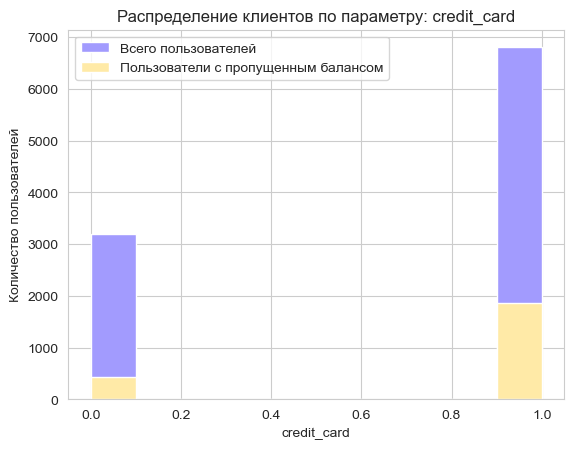

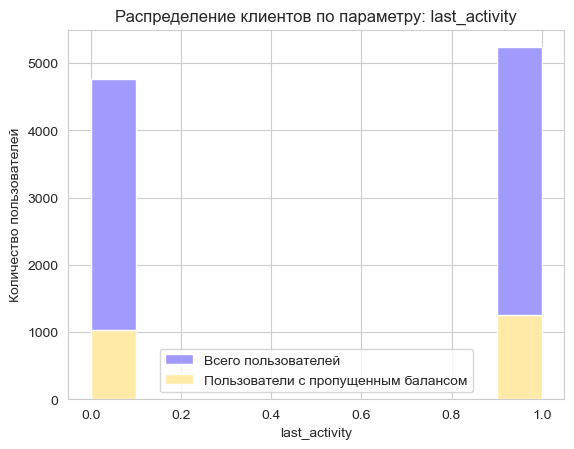

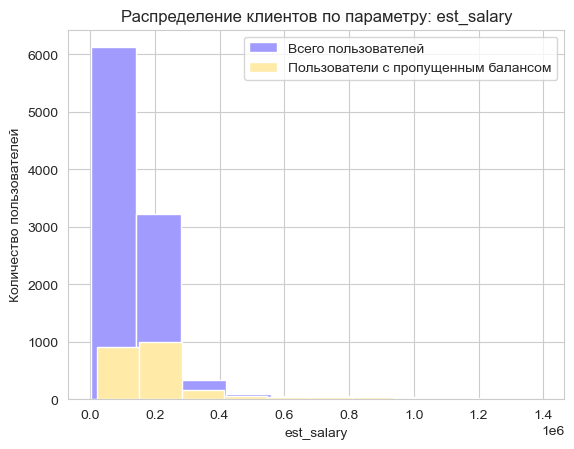

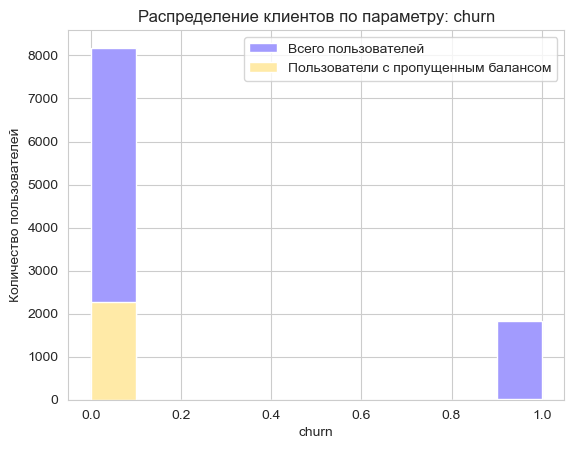

In [16]:
null_blnc = df[df['balance'].isna()]

columns = ['score','gender','products','city','age','equity', 'credit_card', 'last_activity', 'est_salary', 'churn']


for c in columns:
    
    df[c].hist(color='#a29bfe',label='Всего пользователей')
    null_blnc[c].hist(color='#ffeaa7',label='Пользователи с пропущенным балансом')

    # Добавляем подписи осей
    plt.title(f'Распределение клиентов по параметру: {c}', fontsize = 12)
    plt.xlabel(c)
    plt.ylabel('Количество пользователей')

    # Добавляем легенду
    plt.legend()

    # Отображаем гистограмму
    plt.show()

Посмотрим, можно ли их заполнить пропуски в столбце `balance` через значения других столбцов. В случае наличия высокой или сильной корреляции это возможно без сильного искажения данных.

In [17]:
corr = df.corr()

pd.DataFrame(data=corr['balance']).style.background_gradient(cmap='Blues')

Используя данные всего датафрейма, где в столбце `balance` нет пропусков, найти корреляцию для замены не удаётся. 
Как и ожидалось, максимальная корреляция значений баланса со столбцом `est_salary`, но и она по шкале Чеддока относится к умеренной, и замена через уровень зарплаты исказит данные. Все остальные столбцы показывают слабую корреляцию с балансом.

**Не будем заполнять пропуски в столбце `balance` ничем, чтобы не искажать статистику.**

Изучим пропуски в столбце `age`.
Таких пропусков очень мало:

In [18]:
print("Пропущено", df['age'].isna().sum(),"значений в столбце 'age'")

Пропущено 26 значений в столбце 'age'


Так как пропусков мало, то посмотрим как они распределяются по параметрам клиентов в табличной форме:

In [19]:
columns = ['city','gender','score','products','age','equity', 'credit_card', 'last_activity', 'est_salary', 'churn']


for c in columns:
    grouped = df.groupby(c)
    na_perc = grouped['age'].apply(lambda x: (x.isna().sum() / len(x)) * 100)
    na_perc = na_perc.apply(lambda x: "{:.2f}%".format(x))
    print()
    print(na_perc)


city
Ростов       0.07%
Рыбинск      0.45%
Ярославль    0.22%
Name: age, dtype: object

gender
Ж    0.24%
М    0.28%
Name: age, dtype: object

score
642     0.00%
646     0.00%
648     0.00%
649     0.00%
650     0.00%
        ...  
996     0.00%
997     0.00%
998     0.00%
999     0.00%
1000    0.00%
Name: age, Length: 348, dtype: object

products
0    0.00%
1    0.54%
2    0.14%
3    0.10%
4    0.00%
5    0.00%
Name: age, dtype: object

age
18    0.00%
19    0.00%
20    0.00%
21    0.00%
22    0.00%
      ...  
81    0.00%
82    0.00%
83    0.00%
84    0.00%
86    0.00%
Name: age, Length: 68, dtype: object

equity
0    0.62%
1    0.13%
2    0.10%
3    0.13%
4    0.16%
5    0.16%
6    0.00%
7    0.00%
8    0.00%
9    0.00%
Name: age, dtype: object

credit_card
0    0.19%
1    0.29%
Name: age, dtype: object

last_activity
0    0.13%
1    0.38%
Name: age, dtype: object

est_salary
2546.30       0.00%
3487.33       0.00%
5043.14       0.00%
5341.50       0.00%
7054.82       0.00%
      

Можно предположить, что есть определённая зависимость пропусков от филиала банка, так как больше всего пропусков в Рыбинске, то есть пропуски классифицирутся как *MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных*, но в силу их малого количества произведём замену медианами.

Посмотрим, есть ли значимые различия в медианах по городам и полу пользователей:

In [20]:
# Вычисление медианы столбца "age" для каждой комбинации "city" и "gender"
age_median = df.groupby(['city', 'gender'])['age'].median()
age_median.reset_index()

city gender   age
0     Ростов      Ж  45.0
1     Ростов      М  39.0
2    Рыбинск      Ж  44.0
3    Рыбинск      М  39.0
4  Ярославль      Ж  42.0
5  Ярославль      М  38.0

Так как у женского пола медианы по городам имеют небольшие различия, а так же из-за того, что пропусков возраста в датасете *крайне мало*, прибегнем к замене пропусков медианами в сцепке параметров "город - пол", вычисленными выше.

In [21]:
# замена пропусков в столбце "age" медианой
df['age'] = df.apply(lambda row: age_median[row['city'], row['gender']] if pd.isnull(row['age']) else row['age'], axis=1)

При изучении данных мы обратили внимание, что есть пользователи, у которых 0 продуктов в банке. Это не пропуски, но тем не менее посмотрим, что это за пользователи:

In [22]:
df[df['products']==0]

user_id  score     city gender   age  equity  balance  products  \
8957   147837    962  Рыбинск      Ж  79.0       3      NaN         0   

      credit_card  last_activity  est_salary  churn  
8957            0              0    25063.96      1

Это единственный пользователь из Рыбинска, к тому же ушедший из банка. Вполне логично, что продуктов в использовании ноль. Для аналитики такой пользователь не несёт дополнительной пользы, поэтому удалим его.

In [23]:
df.drop(df[df['products'] == 0].index, inplace=True)

### Кодирование данных
<a id='codes'></a>

У клиентов в датасете есть два текстовых параметра:
- пол (М - мужской или Ж - женский)
- город (Ростов, Рыбинск, Ярославль)

Чтобы иметь возможность искать зависимости между оттоком и этими параметрами, их необходимо оцифровать.

В датасете не очень много столбцов (12), а в наших тектовых столбцах всего 2 + 3 варианта значений, поэтому воспльзуемся лёгкой и интуитивно понятной функцией *get_dummies*. Функция создаст фиктивные (dummy) / индикаторные переменные (1 или 0), то есть преобразует значение каждого параметра в новый столбец и присвоит столбцу значение 1 или 0 (Истина / Ложь). Это дает преимущество в том, что значение не взвешивается неправильно, хотя мы и получим + 5 столбцов к датасету.

In [24]:
# Оставим копии изначальных столбцов
df['city_copy'] = df['city'].copy()
df['gender_copy'] = df['gender'].copy()

# Закодируем нужные нам столбцы
df = pd.get_dummies(df,columns=['city','gender'])
df.head()

user_id  score   age  equity     balance  products  credit_card  \
0   183012    850  25.0       1    59214.82         2            0   
1   146556    861  37.0       5   850594.33         3            1   
2   120722    892  30.0       0         NaN         1            1   
3   225363    866  51.0       5  1524746.26         2            0   
4   157978    730  34.0       5      174.00         1            1   

   last_activity  est_salary  churn  city_copy gender_copy  city_Ростов  \
0              1    75719.14      1    Рыбинск           Ж            0   
1              0    86621.77      0    Рыбинск           Ж            0   
2              1   107683.34      0    Рыбинск           Ж            0   
3              1   174423.53      1  Ярославль           Ж            0   
4              0    67353.16      1  Ярославль           М            0   

   city_Рыбинск  city_Ярославль  gender_Ж  gender_М  
0             1               0         1         0  
1             1               0         1         0  
2             1               0         1         0  
3             0               1         1         0  
4             0               1         0         1

## Исследовательский анализ данных
<a id='analysis'></a>

### Анализ распределения клиентов по параметрам (город, пол, возраст и т.п.)
<a id='param'></a>

Изучим центральные тенденции модифицированной таблицы:

In [25]:
df.describe()

user_id        score          age       equity       balance  \
count    9999.000000  9999.000000  9999.000000  9999.000000  7.705000e+03   
mean   171817.110611   848.688069    42.725573     2.627563  8.277943e+05   
std     33709.070798    65.441981    12.160554     1.980931  1.980614e+06   
min     94561.000000   642.000000    18.000000     0.000000  0.000000e+00   
25%    142809.500000   802.000000    33.000000     0.000000  2.955542e+05   
50%    172740.000000   853.000000    40.000000     3.000000  5.242722e+05   
75%    201262.500000   900.000000    51.000000     4.000000  9.807058e+05   
max    229145.000000  1000.000000    86.000000     9.000000  1.191136e+08   

          products  credit_card  last_activity    est_salary        churn  \
count  9999.000000  9999.000000    9999.000000  9.999000e+03  9999.000000   
mean      1.870287     0.680468       0.523552  1.478792e+05     0.181918   
std       0.792466     0.466319       0.499470  1.393901e+05     0.385796   
min       1.000000     0.000000       0.000000  2.546300e+03     0.000000   
25%       1.000000     0.000000       0.000000  7.525212e+04     0.000000   
50%       2.000000     1.000000       1.000000  1.196615e+05     0.000000   
75%       2.000000     1.000000       1.000000  1.745011e+05     0.000000   
max       5.000000     1.000000       1.000000  1.395064e+06     1.000000   

       city_Ростов  city_Рыбинск  city_Ярославль     gender_Ж     gender_М  
count  9999.000000   9999.000000     9999.000000  9999.000000  9999.000000  
mean      0.141714      0.269427        0.588859     0.499450     0.500550  
std       0.348774      0.443684        0.492065     0.500025     0.500025  
min       0.000000      0.000000        0.000000     0.000000     0.000000  
25%       0.000000      0.000000        0.000000     0.000000     0.000000  
50%       0.000000      0.000000        1.000000     0.000000     1.000000  
75%       0.000000      1.000000        1.000000     1.000000     1.000000  
max       1.000000      1.000000        1.000000     1.000000     1.000000

**Выводы:**
1. Медианный кредитный скоринг 853 балла, что близко к среднему значению 848,7 баллов. Значит множества очень высоких баллов, которые смещают среднее, у пользователей нет
2. Медианный возраст пользователей в датасете - 40 лет, среднее не сильно смещено (42,7 лет), значит возрастных пользователей, искажающих среднее, не много. Средний возраст - самое время пользоваться услугами банка в силу знаний и наличия накоплений
3. В среднем пользователи получают 3 балла по собственности
4. Медианное значение средств на балансе у пользователей 524 тыс. По данному параметру существует заметное смещение среднего (828 тыс.) от медианы, так как несколько пользователей с высоким уровнем денег на балансе смещают среднее
5. В среднем клиенты пользуются двумя продуктами банка 
6. 68% киентов имеют кредитные карты
7. 52% клиентов активны (есть над чем поработать)
8. Медианная зарплата около 120 тыс., в то время как средняя зарплата смещена высокими доходами вверх до 148 тыс. Явно существуют пользователи с крайне высокими по датасету доходами (максимум - 1,4 млн.)
9. Средний по банку отток - 18,2%
10. Больше всего клиентов зарегестировано в Ярославле (59%), далее идут Рыбинск (27%) и Ростов (14%)
11. Количество мужчин и женщин в датасете примерно равно


Теперь визуализируем распределение клиентов по параметрам.

Для **количественных** параметров`score`,`age`,`balance` и `est_salary` будем строить графики методом histplot с подобающим количеством корзин:

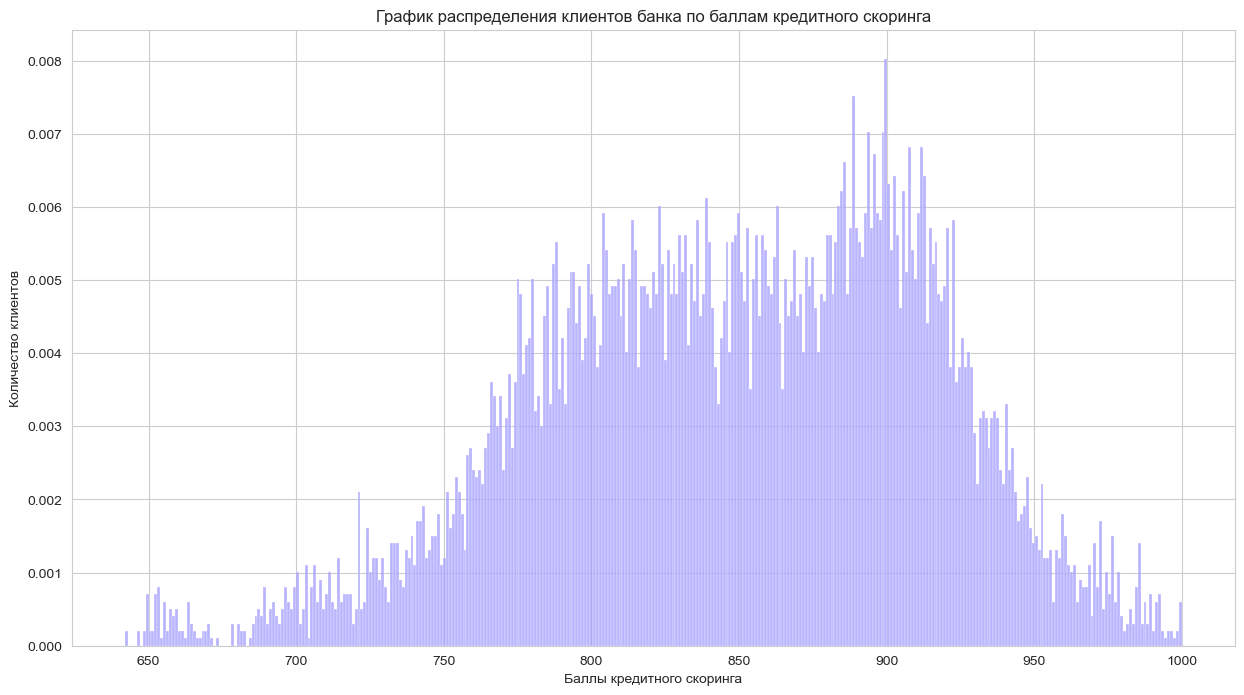

In [26]:
bins = df['score'].max()-df['score'].min()+1
plt.figure(figsize=(15, 8))
plt.title('График распределения клиентов банка по баллам кредитного скоринга')
plt.xlabel('Баллы кредитного скоринга')
plt.ylabel('Количество клиентов')
sns.histplot(data=df['score'],stat="density",common_norm=False,bins=bins,color='#a29bfe');

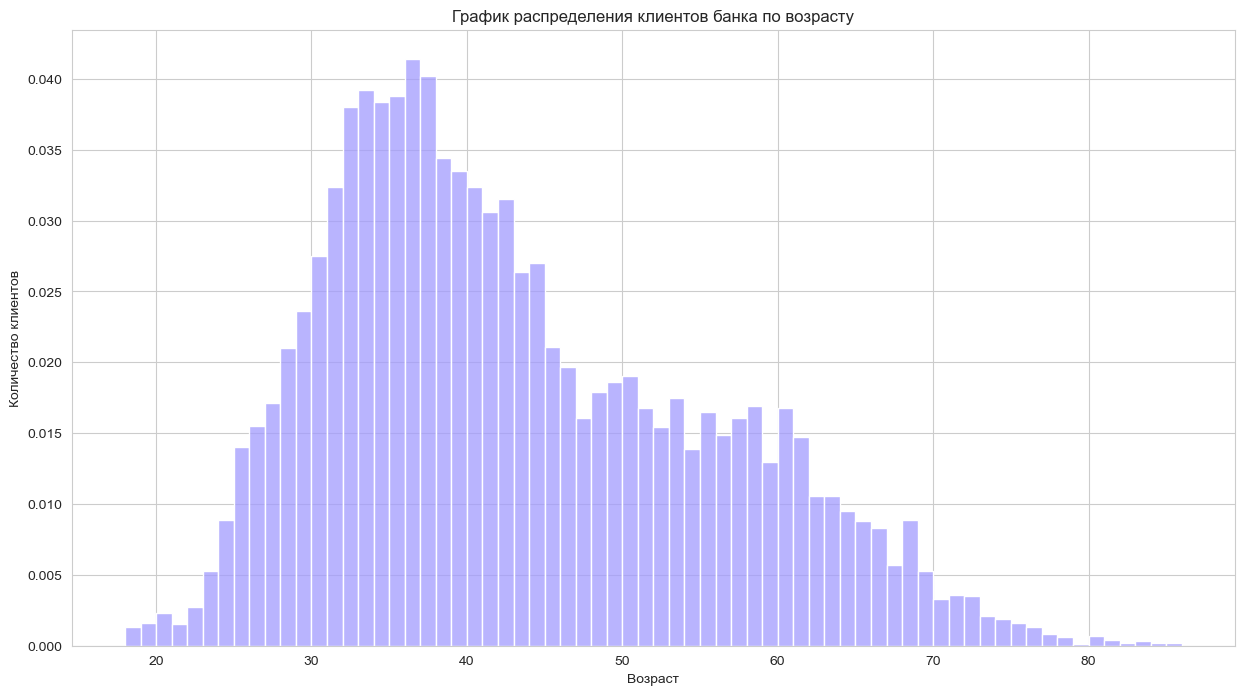

In [27]:
plt.figure(figsize=(15, 8))
plt.title('График распределения клиентов банка по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
sns.histplot(data=df['age'],stat="density",common_norm=False,binwidth=1,color='#a29bfe');

Выше мы отмечали, что в столбце `balance` присутствуют клиенты с большим количеством средств на балансе.
При включении таких клиентов в построение графика мы получаем крайне неинформативную картину (мелкий график, сильно вытянутый вправо - в зону большого баланса и малого количества пользователей).
Посмотрим, какой баланс у большинства пользователей:

In [28]:
percentile_99 = np.percentile(df[df['balance'].notna()]['balance'], [95, 97, 99])
print('99% клиентов банка имеют на балансе менее',percentile_99[2]) 

99% клиентов банка имеют на балансе менее 4827443.494


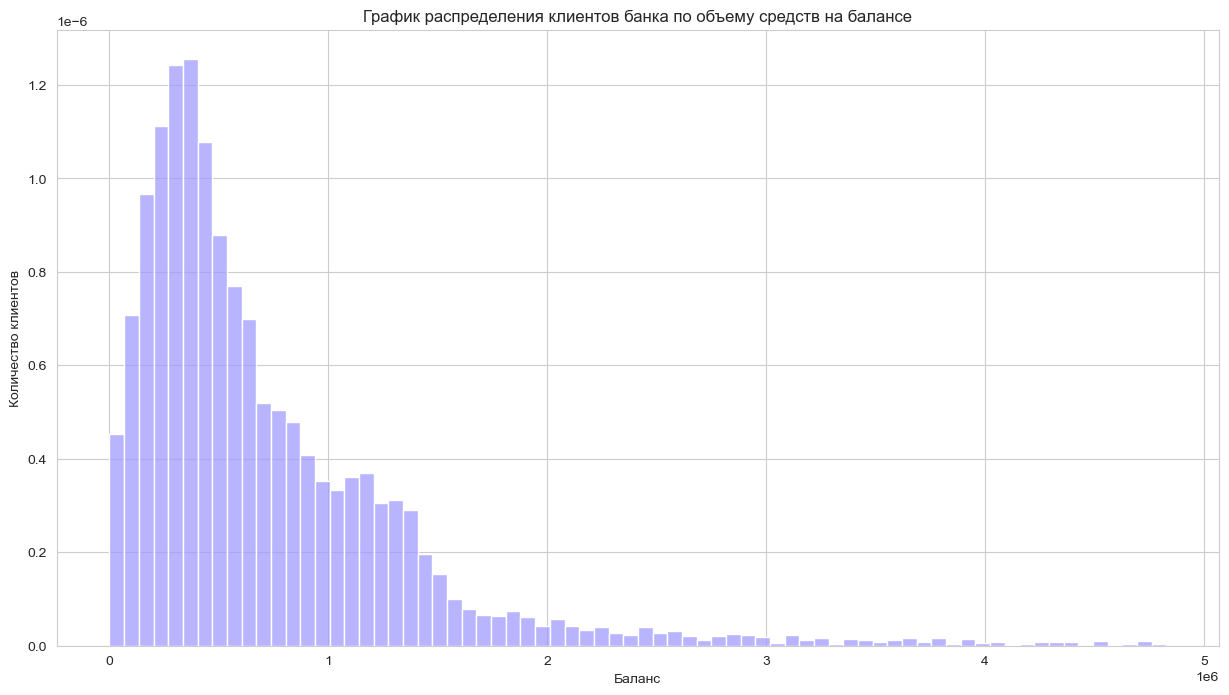

In [29]:
plt.figure(figsize=(15, 8))
plt.title('График распределения клиентов банка по объему средств на балансе')
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')
sns.histplot(data=df[df['balance']<=percentile_99[2]]['balance'],stat="density",common_norm=False,color='#a29bfe');

В столбце `est_salary` также отмечалось присутствие клиентов с очень высоким уровнем заработной платы.
При включении таких клиентов в построение графика мы получаем крайне неинформативную картину (мелкий график, сильно вытянутый вправо - в зону высоких зарплат и малого количества пользователей).
Посмотрим, какая заработная плата у большинства пользователей:

In [30]:
percentile_sal_99 = np.percentile(df['est_salary'], [95, 97, 99])
print('99% клиентов банка имеют заработную плату менее',percentile_sal_99[2]) 

99% клиентов банка имеют заработную плату менее 887938.7692000015


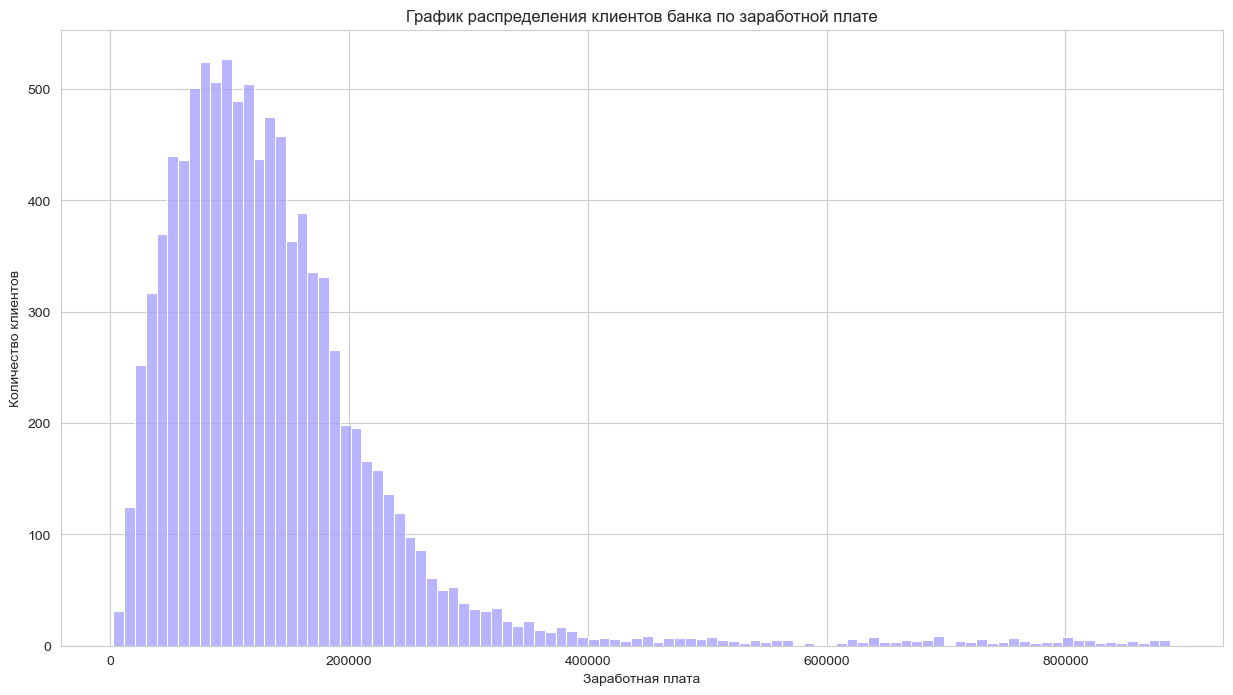

In [31]:
plt.figure(figsize=(15, 8))
plt.title('График распределения клиентов банка по заработной плате')
plt.xlabel('Заработная плата')
plt.ylabel('Количество клиентов')
sns.histplot(data=df[df['est_salary']<=percentile_sal_99[2]]['est_salary'],color='#a29bfe');

**Промежуточные выводы по количественным параметрам клиентов**:
1. Клиенты банка имеют достаточно высокие баллы по кредитному скорингу: больше всего клиентов имеют скоринг между 775 и 925 баллами
2. Больше всего клиентов в возрасте 30-40 лет
3. В основном на балансе клиентов до 200 тыс. рублей
4. В основном клиенты имеют зарплату до 300 тыс. рублей (самая объёмная группа клиентов имеет заработну плату около 100 тыс. рублей) 

Рассмотрим теперь распределение клиентов по **дискретным и категориальным параметрам**.
Это дискретные столбцы `equity` и `products`, категориальные `city` и `gender` и бинарные `credit_card`, `last_activity` и `churn`.
К ним будем применять графики методом barplot.

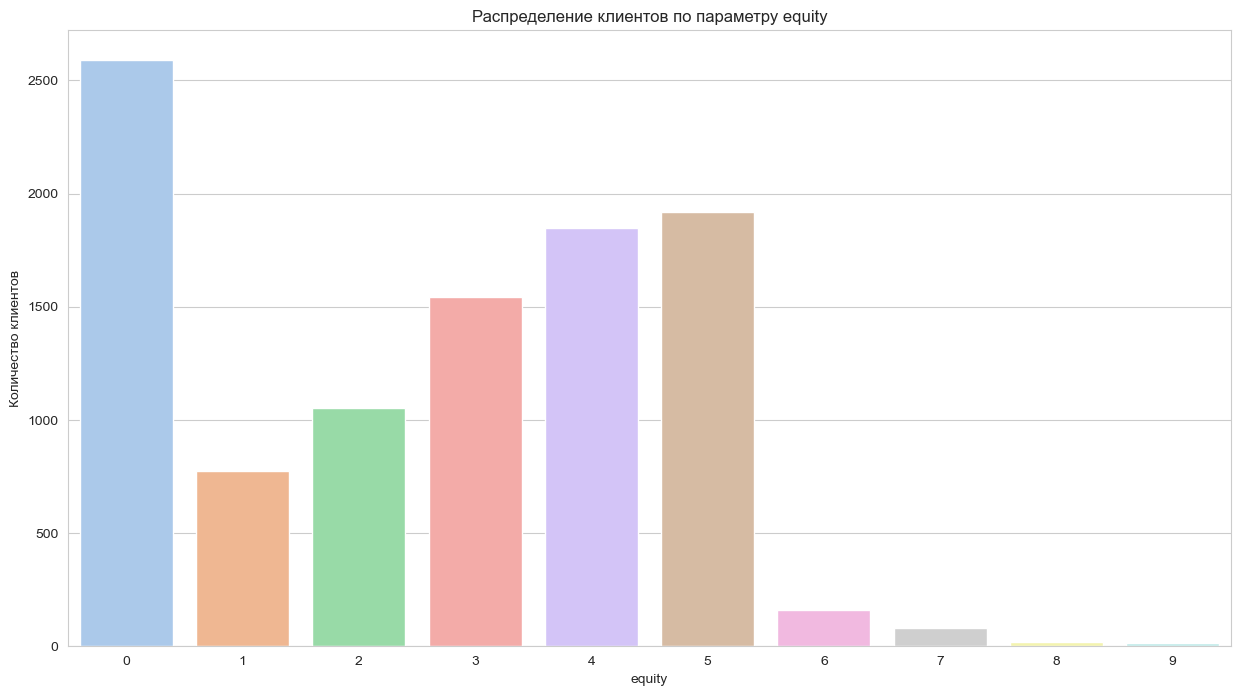

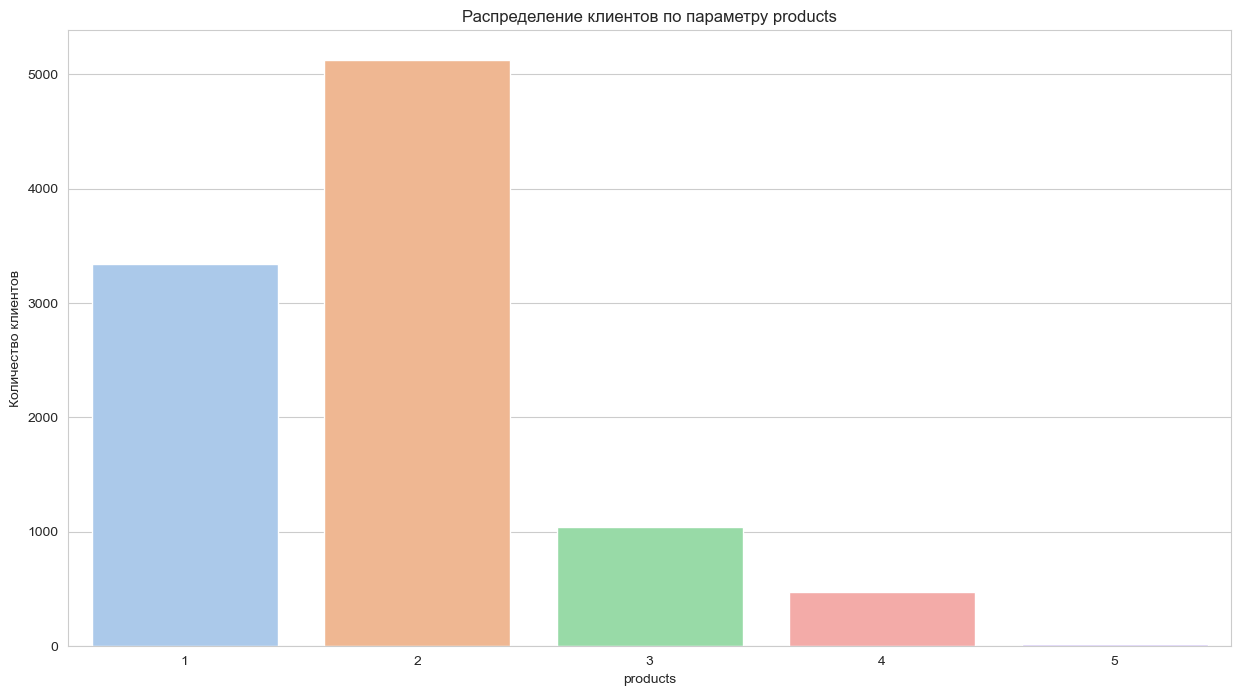

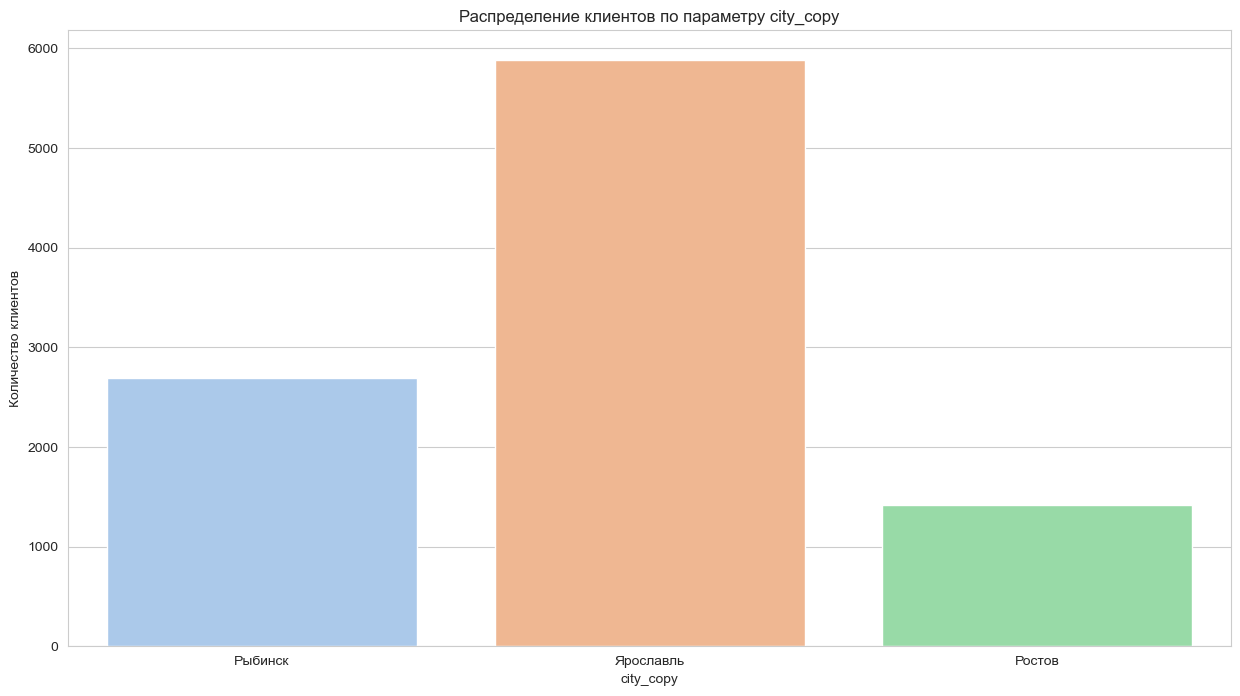

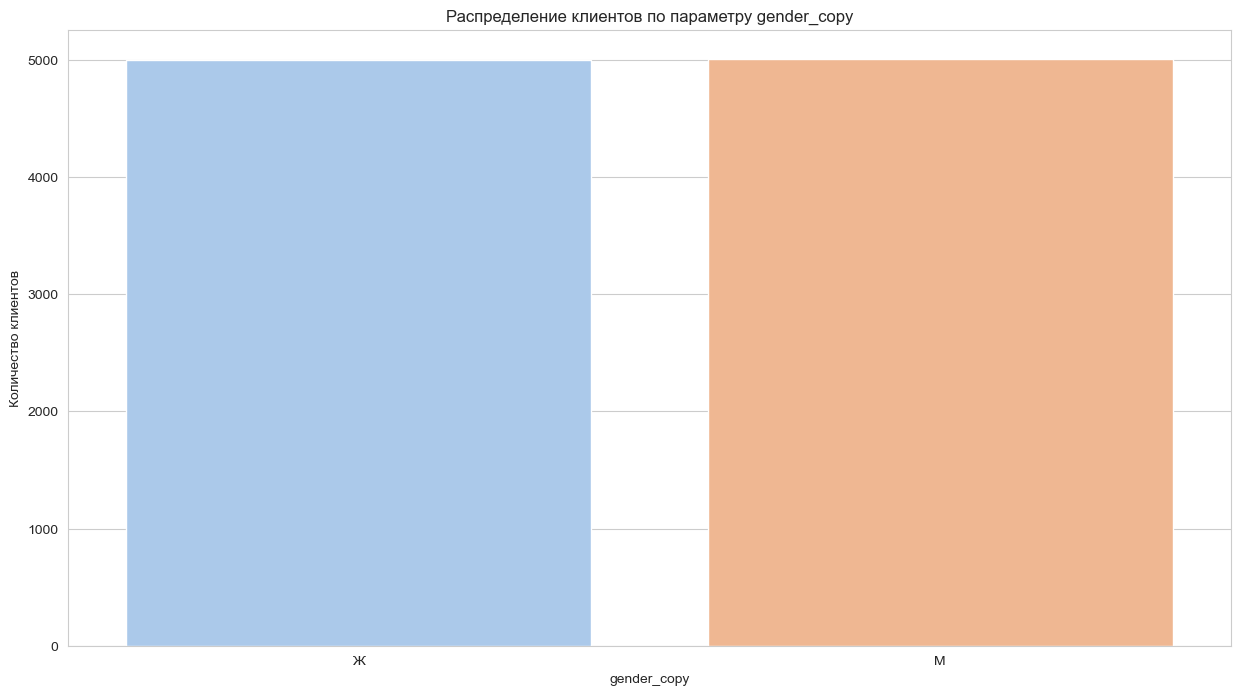

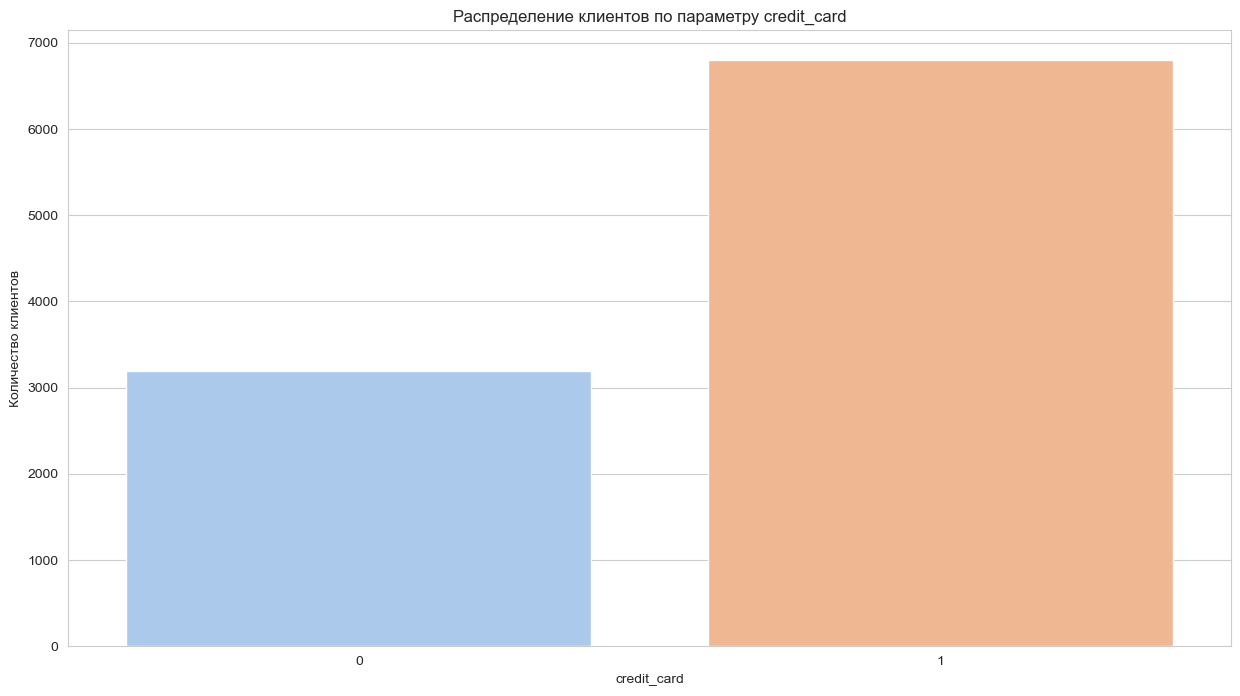

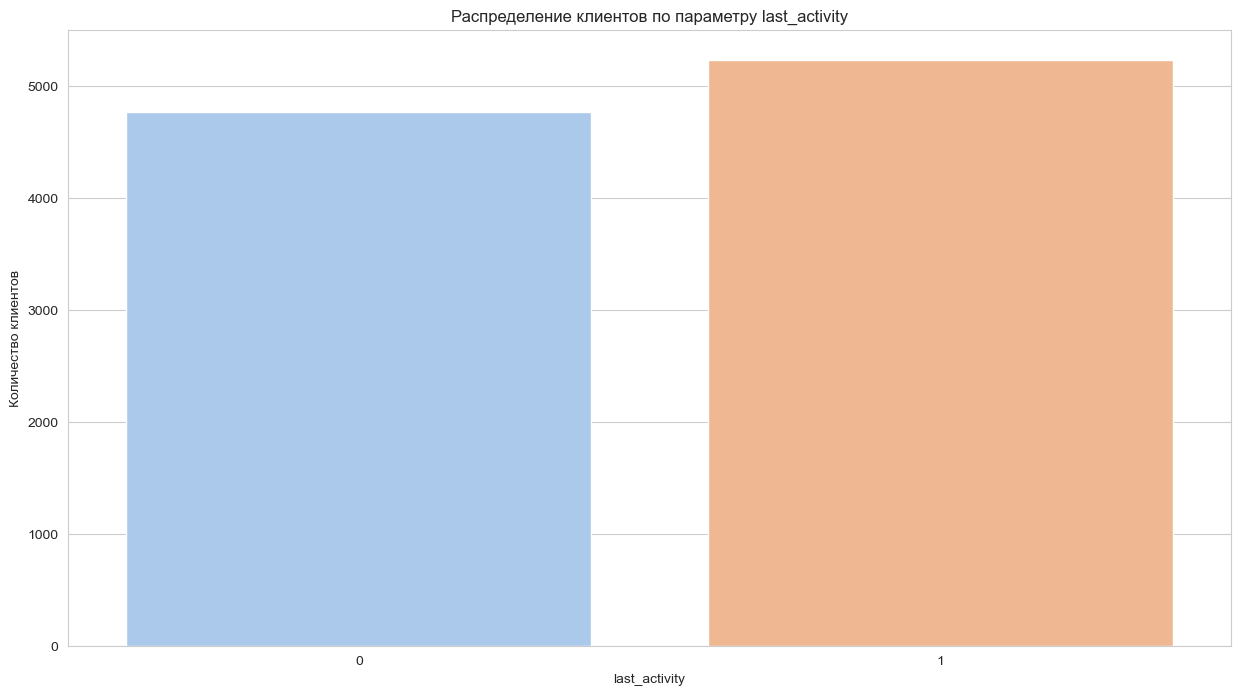

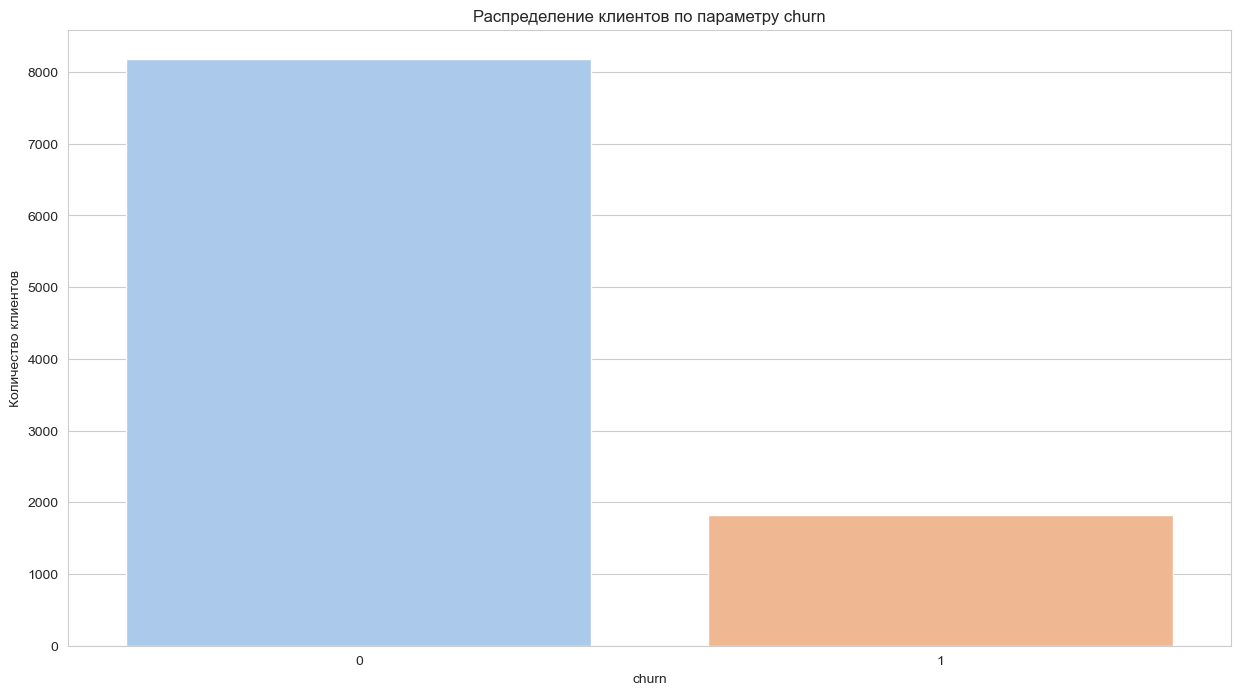

In [32]:
# Список дискретных / категориальных / бинарных столбцов
columns = ['equity', 'products', 'city_copy','gender_copy','credit_card', 'last_activity', 'churn']

# Цикл для итерации по столбцам
for c in columns:
    plt.figure(figsize=(15, 8))
    ax = sns.countplot(data=df, x=c, palette='pastel')
    
    # Добавляем название графика и подписи осей
    ax.set_title(f'Распределение клиентов по параметру {c}')
    ax.set_xlabel(c)
    ax.set_ylabel('Количество клиентов')
 
    # Отображаем график
    plt.show()

**Промежуточные выводы по дискретным / категориальным / бинарным параметрам клиентов**:
1. С явным отрывом лидируют клиенты у которых 0 баллов по собственности. Далее следуют клиенты с баллами 4 и 5. Видимо, банковские продукты интересны тем, у кого не собственности и есть желание её приобрести, либо тем, у кого много различной собственности, на которую необходимы денежные средства, либо после приобретения всего ещё остаются средства для накоплений и других инвестиций
2. Более половины клиентов пользуются двумя банковскими продуктами, треть пользуется одним продуктом
3. Около 58% клиентов обслуживаются в Ярославле, чуь менее трети в Рыбинске, и замыкает список Ростов
4. Женщин и мужчин среди клиентов практически поровну
5. Лишь третья часть клиентов имеет кредитную карту
6. Активных клиентов больше половины, но ненамного (чуть более 50%)
7. 82% клиента остались среди клиентов банка, а 18% ушли в отток

### Анализ портретов клиентов, склонных к оттоку
<a id='portr'></a>

После изучения всех клиентов банка и их распределения по различным параметрам перейдём к главному: определению параметров клиентов, склонных к оттоку.

In [33]:
fig = px.histogram(
    df,
    x="score",
    histnorm='probability',
    barmode ='overlay',
    color="churn",
    color_discrete_sequence=[
        "#a29bfe",
        "#ffeaa7",
    ],
).update_xaxes(categoryorder="total descending")

# оформляем график
fig.update_layout(
    title="Распределение клиентов по кредитному скорингу в зависимости от параметра 'ушедший / не ушедший'",
    xaxis_title="Баллы кредитного скоринга",
    yaxis_title="Количество клиентов",
    legend_title="Параметр оттока",
)


fig.show()

Очевидно, что к оттоку склонны клиенты с достаточно высоким кредитным скорингом: мы видим, что клиенты, ушедшие в отток (параметр оттока - 1) сосредоточены в области 835-900 баллов.

In [34]:
avg_score_1 = df[df['churn']==1]['score'].median()
avg_score_0 = df[df['churn']==0]['score'].median()
print('Средний балл кредитного скоринга у клиентов, ушедших в отток:', avg_score_1)
print('Средний балл кредитного скоринга у оставшихся клиентов:', avg_score_0)

Средний балл кредитного скоринга у клиентов, ушедших в отток: 866.0
Средний балл кредитного скоринга у оставшихся клиентов: 848.0


In [35]:
fig = px.histogram(
    df,
    x="age",
    histnorm='probability',
    barmode ='overlay',
    color="churn",
    color_discrete_sequence=[
        "#a29bfe",
        "#ffeaa7",
    ],
).update_xaxes(categoryorder="total descending")

# оформляем график
fig.update_layout(
    title="Распределение клиентов по возрасту в зависимости от параметра 'ушедший / не ушедший'",
    xaxis_title="Возраст",
    yaxis_title="Количество клиентов",
    legend_title="Параметр оттока",
)


fig.show()

К оттоку склонны две группы клиентов: 25-35 лет и 50-60 лет. Судя по распределению количества клиентов по возрасту можно предположить, что всё-таки к оттоку склонны более молодые клиенты. Посмотрим точнее:

In [36]:
avg_age_1 = df[df['churn']==1]['age'].median()
avg_age_0 = df[df['churn']==0]['age'].median()
print('Средний возраст у клиентов, ушедших в отток:', avg_age_1)
print('Средний возраст у оставшихся клиентов:', avg_age_0)

Средний возраст у клиентов, ушедших в отток: 39.0
Средний возраст у оставшихся клиентов: 40.0


При рассмотрении распределения клиентов по зарплате и балансов отсеим 1% клиентов с крайне высокими средствами на балансе и зарплатами (проявляя аналитическую зависть, назовём это "очищенные от выбросов данные").

In [37]:
fig = px.histogram(
    df[df['balance']<=percentile_99[2]],
    x="balance",
    histnorm='probability',
    barmode ='overlay',
    color="churn",
    color_discrete_sequence=[
        "#a29bfe",
        "#ffeaa7",
    ],
).update_xaxes(categoryorder="total descending")

# оформляем график
fig.update_layout(
    title="Распределение клиентов по размеру баланса с параметром 'ушедший / не ушедший'",
    xaxis_title="Баланс",
    yaxis_title="Количество клиентов",
    legend_title="Параметр оттока",
)


fig.show()

К оттоку склонны клиенты со значительным количеством средств на балансе (свыше 725 тыс.). Возможно, это связано с тем, что достигая определенного уровня накоплений, клиенты снимают их для совершения крупных покупок и уходят из банка, либо уходят на более выгодные предложения по депозитам или инвестиционным вариантам.


При расчёте медианного баланса разница почти в 300 тысяч.

In [38]:
avg_blnc_1 = df[df['churn']==1]['balance'].median()
avg_blnc_0 = df[df['churn']==0]['balance'].median()
print('Средний баланс у клиентов, ушедших в отток:', avg_blnc_1)
print('Средний баланс у оставшихся клиентов:', avg_blnc_0)

Средний баланс у клиентов, ушедших в отток: 782410.47
Средний баланс у оставшихся клиентов: 475382.445


In [39]:
fig = px.histogram(
    df[df['est_salary']<=percentile_sal_99[2]],
    x='est_salary',
    histnorm='probability',
    barmode ='overlay',
    color="churn",
    color_discrete_sequence=[
        "#a29bfe",
        "#ffeaa7",
    ],
).update_xaxes(categoryorder="total descending")

# оформляем график
fig.update_layout(
    title="Распределение клиентов по зарплате с параметром 'ушедший / не ушедший'",
    xaxis_title="Зарплата",
    yaxis_title="Количество клиентов",
    legend_title="Параметр оттока",
)


fig.show()

Более склонны к оттоку клиенты с высокой зарплатой свыше 100 тыс. Возможно, такие клиенты не пользуются кредитами, имеют возможность накопить средства на ту или иную покупку и уйти из банка, а также обладают определённым уровнем финансовой грамотности и уходят на более выгодные предложения. 

Медианная зарплата клиентов в оттоке выше, чем у оставшихся, хотя и не так кардинально, как баланс.

In [40]:
avg_sal_1 = df[df['churn']==1]['est_salary'].median()
avg_sal_0 = df[df['churn']==0]['est_salary'].median()
print('Средняя зарплата у клиентов, ушедших в отток:', avg_sal_1)
print('Средняя зарплата у оставшихся клиентов:', avg_sal_0)

Средняя зарплата у клиентов, ушедших в отток: 125395.22
Средняя зарплата у оставшихся клиентов: 118257.715


Теперь перейдём к дискретным / категориальным и бинарным параметрам клиентов.

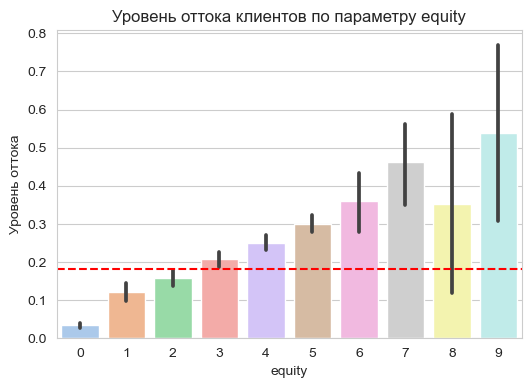

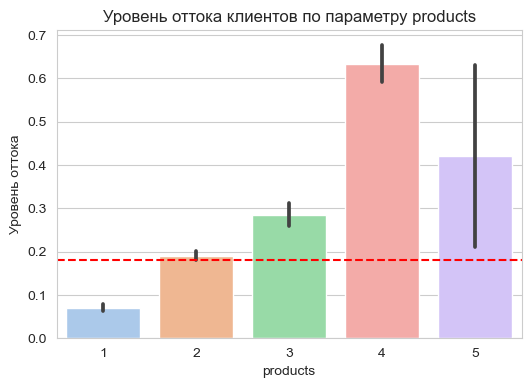

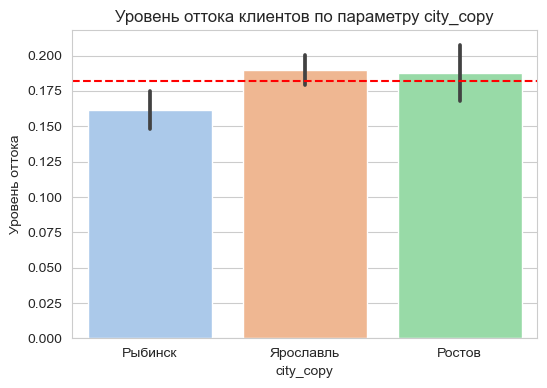

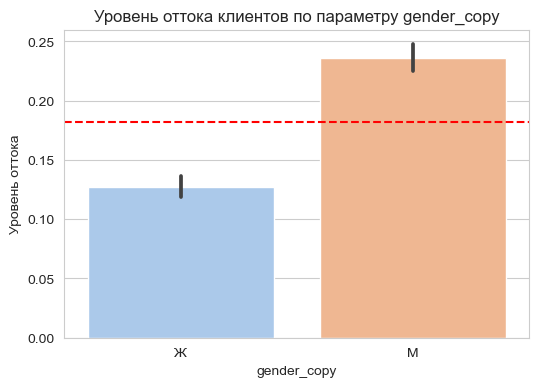

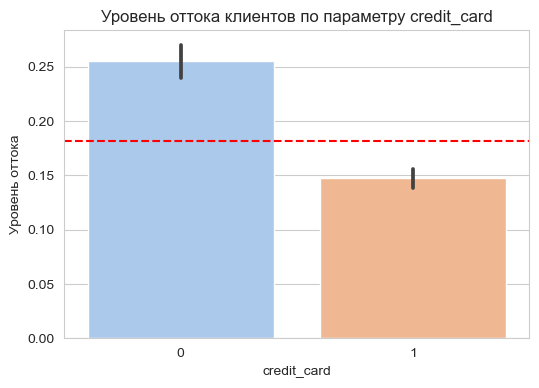

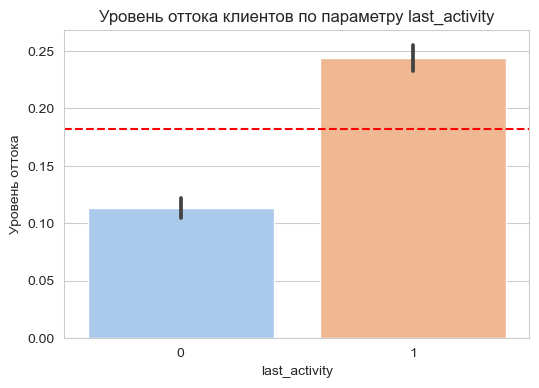

In [41]:
# бинарных столбцов
columns = ['equity', 'products', 'city_copy','gender_copy','credit_card', 'last_activity']

for c in columns:
    plt.figure(figsize=(6, 4))
    ax = sns.barplot(data=df, x=c, y='churn', palette='pastel')
    
    # Добавляем название графика и подписи осей
    ax.set_title(f'Уровень оттока клиентов по параметру {c}')
    ax.set_xlabel(c)
    ax.set_ylabel('Уровень оттока')
    plt.axhline(y=df['churn'].mean(),color='red',linestyle='--')
 
    # Отображаем график
    plt.show()

**Промежуточные выводы по дискретным / категориальным / бинарным параметрам клиентов**:
1. Начиная с 3 баллов по параметру `equity` отток клиентов выше среднего по банку. Самый высокий отток у клиентов с 7 и 9 баллами (46 и 54% соответственно)
2. Начиная с 2-х продуктов у клиентов, отток превышает средний по банку. Самый высокий отток до 63% у клиентов, использующих 4 продукта.
3. В Ярославле и Ростове отток клиентов выше, чем среднее по банку. 
Самый высокий отток в самом объёмном по количеству клиентов филиале: в Ярославле (почти 19% против 18.2% по всему банку).
Отток ниже среднего (всего 16.2%) по банку в Рыбинске, но это самый малочисленный по клиентам филиал.
4. Лидеры по оттоку с точки зрения гендерной принадлжености - мужчины с 23.6% против 12.8% у женщин. Возможно, это связано с тем, что женщины более консервативные инвесторы, более склонны к сбережениям (и менее склонны к кредитам), а также имеют меньше накоплений, чтобы уводить их из банка в другие варианты
5. Менее склонны к оттоку пользователи кредитных карт, что логично (14.7% против 25.6% у тех, кто не пользуется кредитом)
6. Менее склонны к оттоку неактивные клиенты: 11.4% против 24.4% у активных. Видимо, неактивные забывают про свои продукты / ничего не хотят менять, в то время как активные клиенты держат руку на пульсе рынка банковских услуг

Сведём сравнение отточных и оставшихся клиентов в одну таблицу. 
Для всех параметров используем медианы и моды, так как в случае с зарплатой и балансом мы видим перекос среднего за счёт нескольких клиентов с очень большой зарплатой/балансом.

In [42]:
cr_card_1 = df[df["churn"] == 1]['credit_card'].mean()
cr_card_1

0.5514018691588785

In [43]:
eq_1 = df[df["churn"] == 1]["equity"].median()
eq_0 = df[df["churn"] == 0]["equity"].median()

prod_1 = df[df["churn"] == 1]["products"].median()
prod_0 = df[df["churn"] == 0]["products"].median()

rov_1 = df[df["city_Ростов"] == 1]["churn"].mean() * 100
rov_0 = 100 - rov_1

yar_1 = df[df["city_Ярославль"] == 1]["churn"].mean() * 100
yar_0 = 100 - yar_1

ryb_1 = df[df["city_Рыбинск"] == 1]["churn"].mean() * 100
ryb_0 = 100 - ryb_1

male_1 = df[df["gender_М"] == 1]["churn"].mean() * 100
male_0 = 100 - male_1

female_1 = df[df["gender_Ж"] == 1]["churn"].mean() * 100
female_0 = 100 - female_1

cr_card_1 = df[df["churn"] == 1]['credit_card'].mean()
cr_card_0 = df[df["churn"] == 0]['credit_card'].mean()

act_us_1 = df[df["churn"] == 1]['last_activity'].mean()
act_us_0 = df[df["churn"] == 0]['last_activity'].mean()

data = {
    "Отток": [
        round(avg_score_1,1),
        round(avg_age_1,1),
        round(avg_blnc_1,1),
        round(avg_sal_1,1),
        round(eq_1,1),
        round(prod_1,1),
        round(rov_1,1),
        round(yar_1,1),
        round(ryb_1,1),
        round(male_1,1),
        round(female_1,1),
        round(cr_card_1,1),
        round(act_us_1,1),
    ],
    "Не отток": [
        round(avg_score_0,1),
        round(avg_age_0,1),
        round(avg_blnc_0,1),
        round(avg_sal_0,1),
        round(eq_0,1),
        round(prod_0,1),
        round(rov_0,1),
        round(yar_0,1),
        round(ryb_0,1),
        round(male_0,1),
        round(female_0,1),
        round(cr_card_0,1),
        round(act_us_0,1),
    ],
    "Относительная разница, %": [
        round((avg_score_1-avg_score_0)/avg_score_0*100,1),
        round((avg_age_1-avg_age_0)/avg_age_0*100,1),
        round((avg_blnc_1-avg_blnc_0)/avg_blnc_0*100,1),
        round((avg_sal_1-avg_sal_0)/avg_sal_0*100,1),
        '-',
        '-',
        '-',
        '-',
        '-',
        '-',
        '-',
        '-',
        '-',
        
    ]
}

index = [
    "Средний балл кредитного скоринга",
    "Средний возраст",
    "Средний баланс счёта",
    "Средняя зарплата",
    "Медианные баллы собственности",
    "Медианное количество продуктов",
    "Параметры оттока по Ростову",
    "Параметры оттока по Ярославлю",
    "Параметры оттока по Рыбинску",
    "Параметры оттока мужчин",
    "Параметры оттока женщин",
    "Наличие кредитной карты",
    "Активный клиент"
]

EDA_summary = pd.DataFrame(data, index=index)

EDA_summary

Отток  Не отток Относительная разница, %
Средний балл кредитного скоринга     866.0     848.0                      2.1
Средний возраст                       39.0      40.0                     -2.5
Средний баланс счёта              782410.5  475382.4                     64.6
Средняя зарплата                  125395.2  118257.7                      6.0
Медианные баллы собственности          4.0       3.0                        -
Медианное количество продуктов         2.0       2.0                        -
Параметры оттока по Ростову           18.8      81.2                        -
Параметры оттока по Ярославлю         19.0      81.0                        -
Параметры оттока по Рыбинску          16.2      83.8                        -
Параметры оттока мужчин               23.6      76.4                        -
Параметры оттока женщин               12.7      87.3                        -
Наличие кредитной карты                0.6       0.7                        -
Активный клиент                        0.7       0.5                        -

**Портрет клиентов, наиболее склонных к оттоку:**
1. Пользуются услугами банка в Ярославле
2. Являются мужчинами
3. В среднем немного моложе тех, кто остается клиентами банка и среднего возраста по всем клиентам банка (39 против 40 лет)
4. Имеют высокий баланс (более 725 тыс.), а также высокую зарплату (более 100 тыс.): это выше, чем те, кто не склонен к оттоку, а также в среднем по банку
5. Имеют более высокие баллы кредитного скоринга, чем те, кто не склонен к оттоку, а также в среднем по банку (866 баллов против 848 и 853 балла соответственно)
6. Реже имеют кредитную карту (в 55% случаев)
7. В основном активные клиенты


In [44]:
portrait = df.groupby(by="churn", as_index=False).agg(
    {
        "score": "median",
        "age": "median",
        "balance": "median",
        "est_salary": "median",
        "equity": "median",
        "products": "median",
        "credit_card": "mean",
        "last_activity": "mean",       
    }
)

rov_1 = df[df["city_Ростов"] == 1]["churn"].mean() * 100
rov_0 = 100 - rov_1

yar_1 = df[df["city_Ярославль"] == 1]["churn"].mean() * 100
yar_0 = 100 - yar_1

ryb_1 = df[df["city_Рыбинск"] == 1]["churn"].mean() * 100
ryb_0 = 100 - ryb_1

male_1 = df[df["gender_М"] == 1]["churn"].mean() * 100
male_0 = 100 - male_1

female_1 = df[df["gender_Ж"] == 1]["churn"].mean() * 100
female_0 = 100 - female_1

portrait['city_Ярославль'] = [yar_0,yar_1]
portrait['city_Ростов'] = [rov_0,rov_1]
portrait['city_Рыбинск'] = [ryb_0,ryb_1]
portrait['gender_М'] = [male_0,male_1]
portrait['gender_Ж'] = [female_0,female_1]

portrait = portrait.T

portrait.columns = ['Не отток','Отток']

portrait

Не отток      Отток
churn                    0          1
score                848.0      866.0
age                   40.0       39.0
balance         475382.445  782410.47
est_salary      118257.715  125395.22
equity                 3.0        4.0
products               2.0        2.0
credit_card       0.709169   0.551402
last_activity     0.483741   0.702584
city_Ярославль   81.029212  18.970788
city_Ростов      81.227946  18.772054
city_Рыбинск     83.815887  16.184113
gender_М         76.363636  23.636364
gender_Ж         87.264718  12.735282

### Корреляционный анализ параметров клиентов и оттока
<a id='corr'></a>

Построим сначала матрицу стандартной корреляции Спирмена по столбцам, для которых есть смысл смотреть корреляцию. Данный метод показывает направление корреляции, но хуже работает с разными категориями данных.

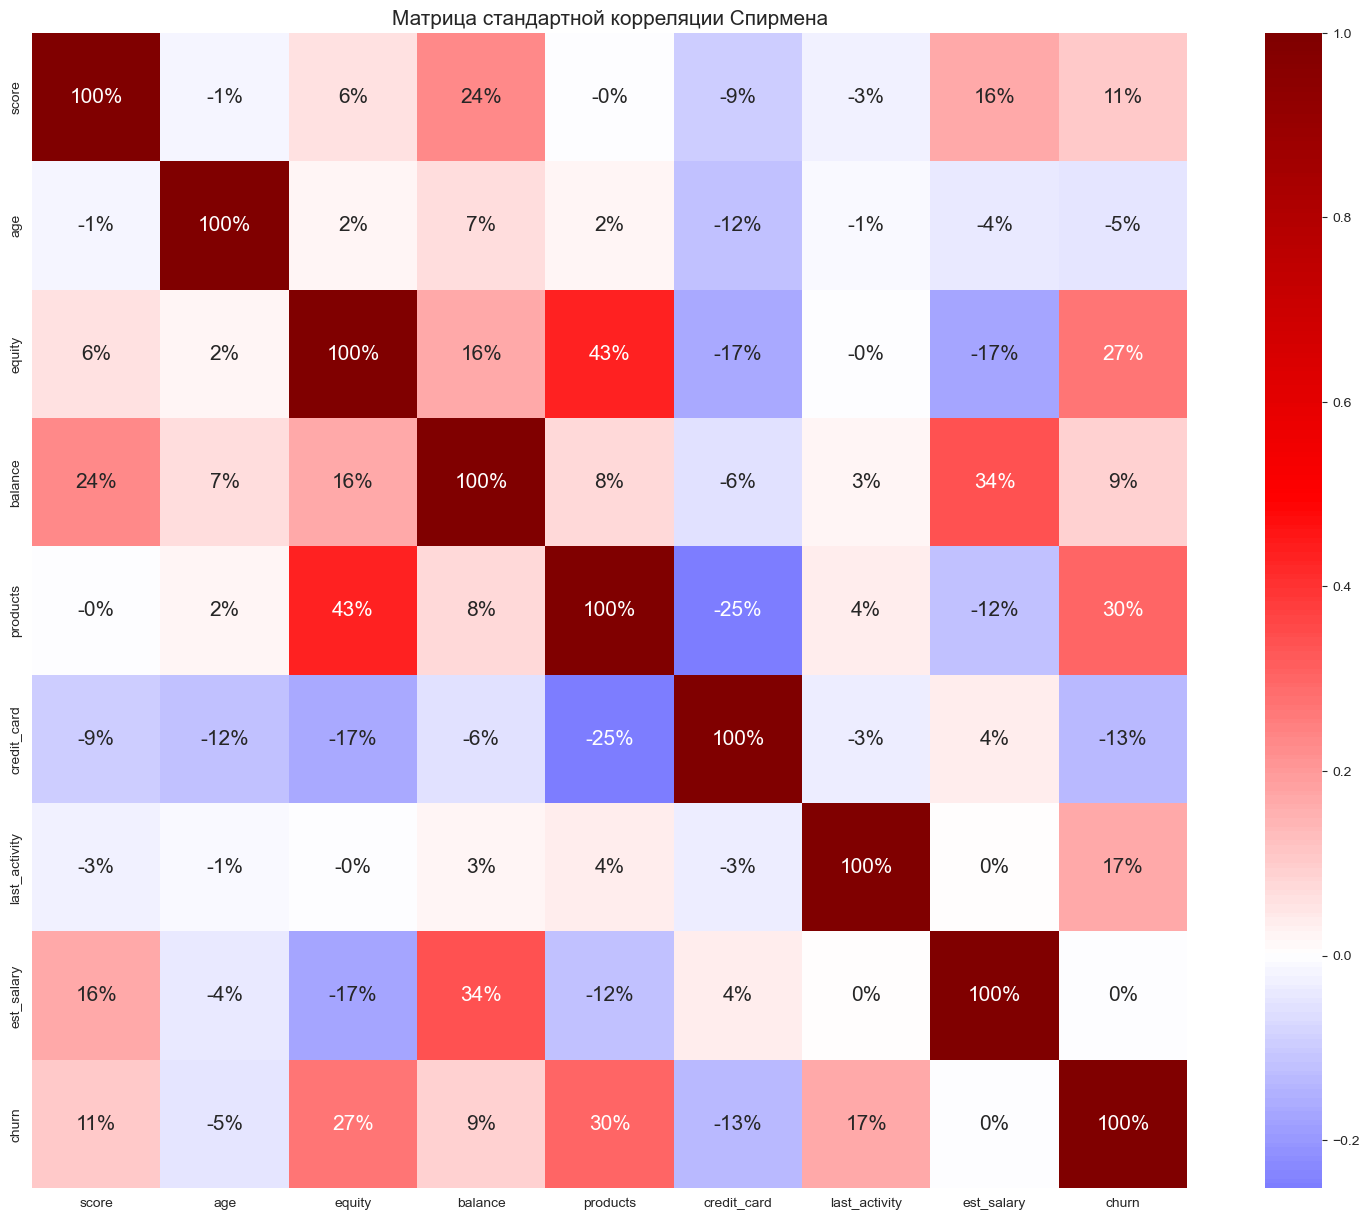

In [45]:
corr_columns = [
    "score",
    "age",
    "equity",
    "balance",
    "products",
    "credit_card",
    "last_activity",
    "est_salary",
    "churn",
    "city_copy",
    "gender_copy",
]

# Создание подмножества датафрейма с выбранными столбцами
df_corr = df[corr_columns]

# Создание матрицы корреляции для подмножества датафрейма
corr_matrix = df_corr.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(
    corr_matrix,
    annot=True,
    square=True,
    cmap="seismic",
    annot_kws={"size": 15},
    fmt='.0%',
    center=0,
)
plt.title("Матрица стандартной корреляции Спирмена", fontsize=15)
plt.show()


Согласно шкале Чеддока заметной корреляции (50-70%) между параметрами клиентов не наблюдается.

Умеренная корреляция присутствует между:
- баллами по собственности и количеством продуктов (43%), видимо, разные типы и/или большое количество собственности коррелируют с используемыми для этого банковскими продуктами
- заработной платой и балансом (34%), что логично: выше заработная плата - больше возможностей откладывать средства на баланс
- оттоком и количеством продуктов (30%): предположительно, большое количество банковских продуктов влечёт за собой желание искать более выгодные варианты в других банках

Все остальные параметры показывают слабую корреляцию между собой.

Отдельно выделим корреляцию оттока с другими параметрами, чтобы показать, что она слабая:

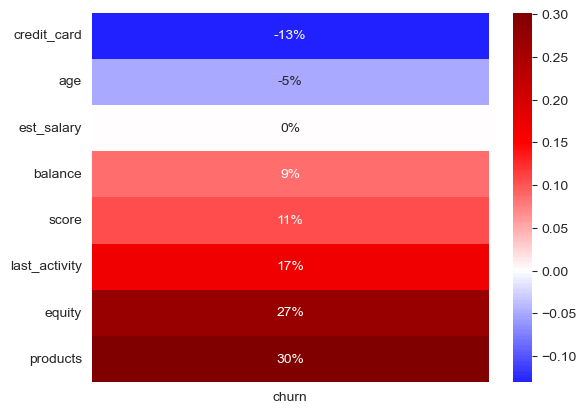

In [46]:
sns.heatmap(corr_matrix.loc[:,['churn']].drop('churn').sort_values('churn'),annot=True,fmt='.0%',cmap='seismic',center=0);

Рассмотрим корреляцию также с помощью библиотке phik, которая работает со всеми параметрами, считая нужный тип корреляции в зависимости от принадлежности параметра к той или иной категории, но не показывает направление зависимости (в нашем датасете ранее мы не нашли значимой отрицательной зависимости, так что можем смотреть на результат, как есть).

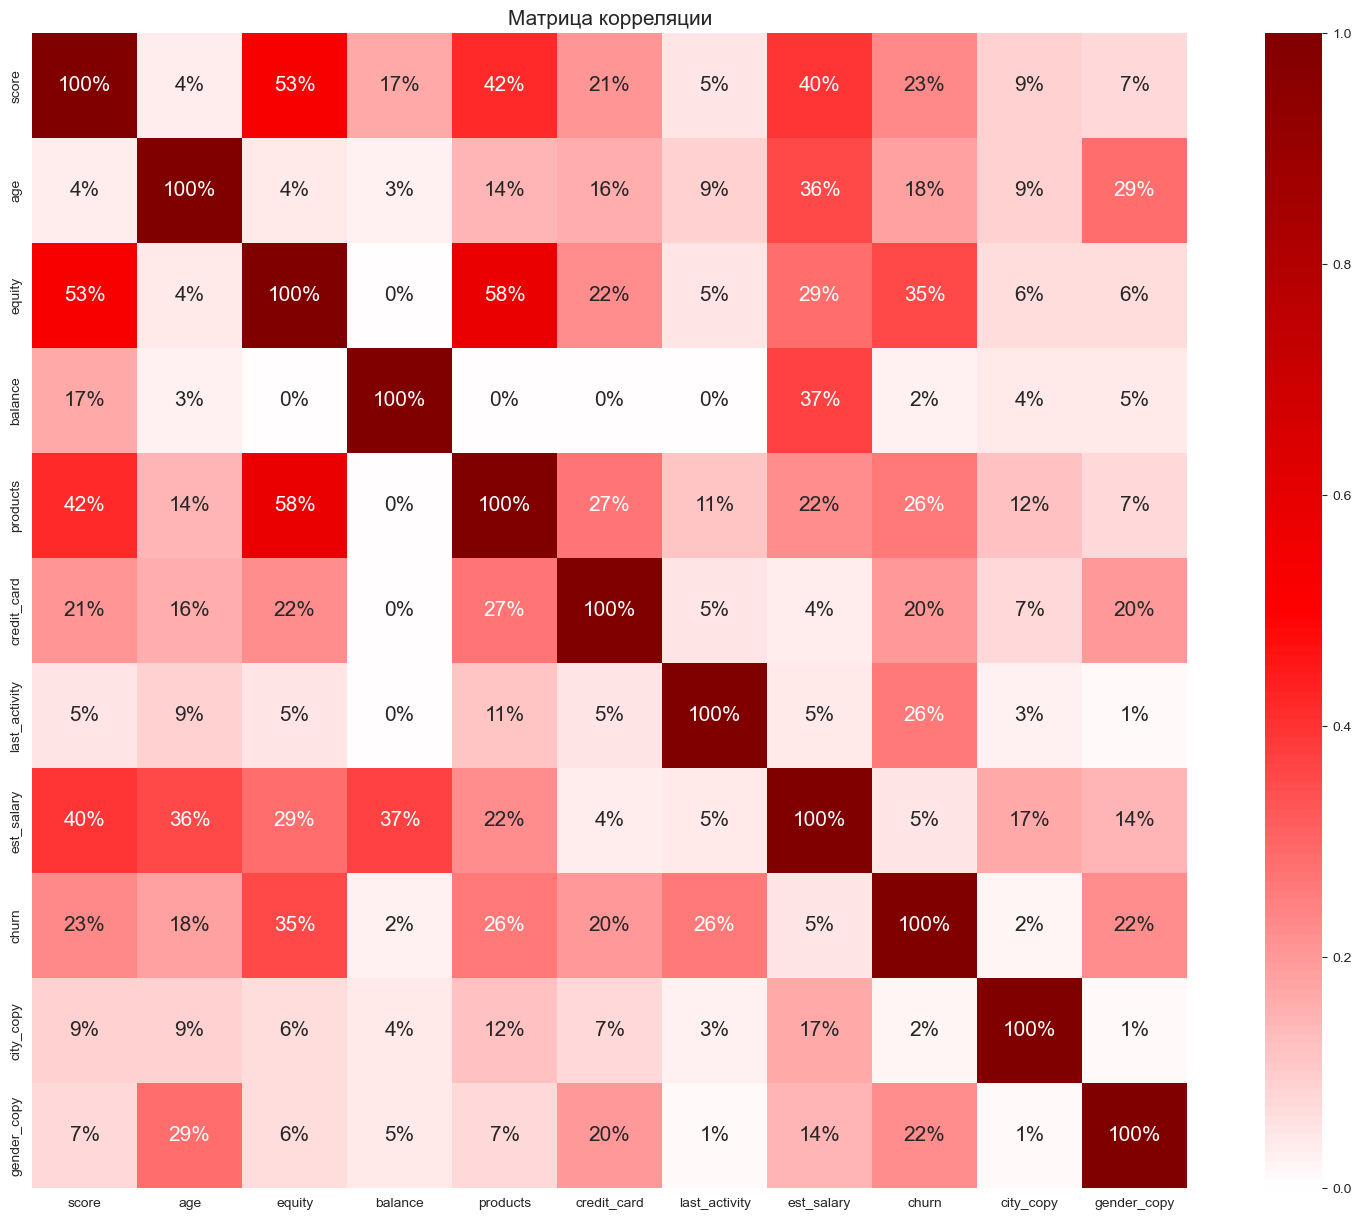

In [47]:
correlation_matrix = df_corr.phik_matrix(
    interval_cols=["score", "age", "balance", "est_salary"]
)

plt.figure(figsize=(20, 15))
sns.heatmap(
    correlation_matrix,
    annot=True,
    square=True,
    cmap="seismic",
    annot_kws={"size": 15},
    fmt='.0%',
    center=0,
)
plt.title("Матрица корреляции", fontsize=15)
plt.show()

При учете категории параметров мы видим, что:
- корреляция между количеством баллов за собственность и кредитным скорингом заметная (53%), а между зарплатой и кредитным скорингом умеренная (40%), что логично (больше собственности и выше зарплата- больше кредитоспособность)
- корреляция между наличием кредитной карты и количеством продуктов умеренная (46%) - возможно, кредитная карта открывает новые горизонты для управления денежными средствами и ипользованием банковских продуктов
- корреляция между баллами за собственность и количеством продуктов умеренная (44%)
- корреляция между балансом и зарплатой умеренная (37%)
- корреляция между возрастом и зарплатой умеренная (36%) - выходит, что есть тенденция увеличения зарплаты с возрастом

Все остальные параметры слабо коррелируют между собой.

Корреляция оттока с другими параметрами вынесена отдельно ниже:

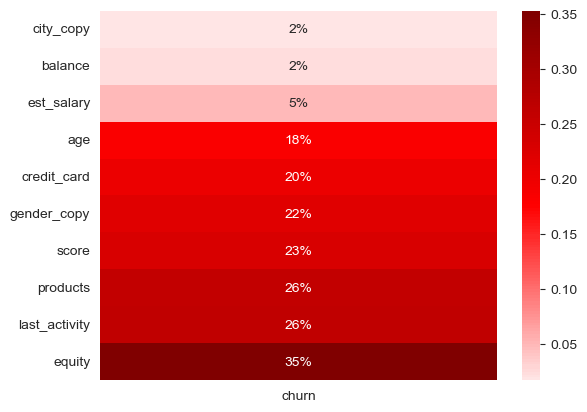

In [48]:
sns.heatmap(correlation_matrix.loc[:,['churn']].drop('churn').sort_values('churn'),annot=True,fmt='.0%',cmap='seismic',center=0);

Умеренная корреляция оттока находится лишь с количеством баллов за собственность (35%) и с количеством банковских продуктов (44%). Как мы уже предполагали ранее, это может быть связано с отсутсвием необходимости прибегать к банковским услугам для дальнейших покупок, либо с переходом к конкурентам на более выгодные условия.

## Проверка статистических гипотез
<a id='hipo'></a>

Мы будем проверять четыре статистические гипотезы, которые помогут нам в будущей сегментации отточных клиентов:

- **Проверка статистической значимости различий в среднем кредитном скоринге ушедших и оставшихся клиентов:**


*Нулевая гипотеза*: средний кредитный скоринг (в баллах) ушедших клиентов равен среднему кредитному скорингу оставшихся клиентов


*Альтернативная гипотеза*: средний кредитный скоринг (в баллах) ушедших клиентов **не** равен среднему кредитному скорингу оставшихся клиентов
    
- **Проверка статистической значимости различий в среднем возрасте ушедших и оставшихся клиентов:**

*Нулевая гипотеза*: средний возраст ушедших клиентов равен среднему возрасту оставшихся клиентов


*Альтернативная гипотеза*: средний возраст ушедших клиентов **не** равен среднему возрасту оставшихся клиентов

- **Проверка статистической значимости различий в количестве используемых продуктов ушедших и оставшихся клиентов**

*Нулевая гипотеза*: среднее количество продуктов у ушедших и оставшихся клиентов одинаковое


*Альтернативная гипотеза*: среднее количество продуктов у ушедших и оставшихся клиентов **разное**

- **Проверка статистической значимости различий в наличии/отсутсвии кредитной карты у ушедших и оставшихся клиентов**

*Нулевая гипотеза*: доля наличия кредитной карты у ушедших и у оставшихся клиентов одинаковая


*Альтернативная гипотеза*:  доля наличия кредитной карты у ушедших и у оставшихся клиентов **разная**

**Для проверки статистических гипотез мы будем использовать t-тест.**

T-тест (тест Стьюдента) применяется для проверки статистических гипотез о различии между средними значениями двух независимых выборок. Он основывается на распределении Стьюдента и позволяет оценить, насколько различны средние значения двух групп.

Тест Стьюдента может быть применен в следующих случаях:

- Сравнение средних двух групп: t-тест позволяет проверить, есть ли статистически значимая разница между средними значениями двух независимых групп

*Группы ушедших и оставшихся клиентов независимы*
    
    
- Нормальность распределения данных

.T-тест предполагает нормальность данных, поскольку основывается на распределении Стьюдента, которое предполагает нормальность.

   Однако, в некоторых случаях, при условии что выборки достаточно большие (обычно более 30 наблюдений) и нет явных нарушений других предпосылок, t-тест может быть устойчивым к нарушению нормальности распределения

   *В нашем случае данная поправка работает: наблюдений много + сами распределения по скорингу и возрасту стремятся к нормальным*

- Равенство дисперсий (рассмотрим ниже)

В случае неравенства ставится параметр *equal_var=False*

Критерий значимости установим на уровне 5%, так как в рамках данного исследования стремится к уровню крайней значимости (1%) нет необходимости в силу природы исследования (нам не грозят масштабные убытки в случае ошибки).

При проверке гипотез, связанных с балансом, будем убирать незаполненные пропуски методом dropna().

### Проверка статистической значимости различий в кредитном скоринге ушедших и оставшихся клиентов

**Нулевая гипотеза**: средний кредитный скоринг (в баллах) ушедших клиентов равен среднему кредитному скорингу оставшихся клиентов


**Альтернативная гипотеза**: средний кредитный скоринг (в баллах) ушедших клиентов **не** равен среднему кредитному скорингу оставшихся клиентов


In [49]:
alpha = 0.05
score_churn_1 = df[df['churn']==1]['score']
score_churn_0 = df[df['churn']==0]['score']

if np.var(score_churn_1)>=np.var(score_churn_0):
    print('Дисперсия скоринга ушедших клиентов выше дисперсии оставшихся в', np.var(score_churn_1)/np.var(score_churn_0))
else:
    print('Дисперсия скоринга оставшихся клиентов выше дисперсии ушедших в', np.var(score_churn_0)/np.var(score_churn_1))

levene = st.levene(score_churn_1,score_churn_0,center='median')
if levene[1]<alpha:
    print('По тесту Ливена диспресии различаются')

Дисперсия скоринга оставшихся клиентов выше дисперсии ушедших в 1.8851845392788353
По тесту Ливена диспресии различаются


Дисперсии достаточно сильно различаются, поэтому ставим параметр *equal_var*=**False**

In [50]:
alpha = 0.05

results = st.ttest_ind(score_churn_1.astype('float'), score_churn_0.astype('float'), equal_var=False)

p_value_percentage = results.pvalue * 100

print('p-значение: {:.3f}%'.format(p_value_percentage))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.000%
Отвергаем нулевую гипотезу


### Проверка статистической значимости различий в среднем возрасте ушедших и оставшихся клиентов

In [51]:
age_churn_1 = df[df['churn']==1]['age']
age_churn_0 = df[df['churn']==0]['age']

print('Дисперсия возраста ушедших клиентов', round(np.var(age_churn_1)))
print('Дисперсия возраста оставшихся клиентов', round(np.var(age_churn_0)))

Дисперсия возраста ушедших клиентов 124
Дисперсия возраста оставшихся клиентов 153


Дисперсии достаточно сильно различаются, поэтому ставим параметр *equal_var*=**False**

In [52]:
alpha = 0.05

results = st.ttest_ind(age_churn_1, age_churn_0, equal_var=False)

p_value_percentage = results.pvalue * 100

print('p-значение: {:.3f}%'.format(p_value_percentage))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.000%
Отвергаем нулевую гипотезу


### Проверка статистической значимости различий в количестве используемых продуктов ушедших и оставшихся клиентов

In [53]:
prod_churn_1 = df[df['churn']==1]['products']
prod_churn_0 = df[df['churn']==0]['products']

print('Дисперсия количества продуктов ушедших клиентов', round(np.var(prod_churn_1),2))
print('Дисперсия количества продуктов оставшихся', round(np.var(prod_churn_0),2))

Дисперсия количества продуктов ушедших клиентов 0.85
Дисперсия количества продуктов оставшихся 0.51


Дисперсии различаются, поэтому ставим параметр *equal_var*=**False**

In [54]:
alpha = 0.05

results = st.ttest_ind(prod_churn_1, prod_churn_0, equal_var=False)

p_value_percentage = results.pvalue * 100

print('p-значение: {:.3f}%'.format(p_value_percentage))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.000%
Отвергаем нулевую гипотезу


### Проверка статистической значимости различий в наличии/отсутсвии кредитной карты у ушедших и оставшихся клиентов

In [55]:
card_churn_1 = df[df['churn']==1]['credit_card']
card_churn_0 = df[df['churn']==0]['credit_card']
print('Дисперсия доли наличия кредитной карты у ушедших клиентов', round(np.var(card_churn_1),3))
print('Дисперсия доли наличия кредитной карты у оставшихся клиентов', round(np.var(card_churn_0),3))

Дисперсия доли наличия кредитной карты у ушедших клиентов 0.247
Дисперсия доли наличия кредитной карты у оставшихся клиентов 0.206


Дисперсии различаются, поэтому ставим параметр *equal_var*=**False**

In [56]:
alpha = 0.05

results = st.ttest_ind(card_churn_1, card_churn_0, equal_var=False)

p_value_percentage = results.pvalue * 100

print('p-значение: {:.3f}%'.format(p_value_percentage))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.000%
Отвергаем нулевую гипотезу


**Выводы по проверке статистических гипотез:**
Все изученные различия являются статистически значимыми. Крайне маловероятно, что найденное в выборке различие является результатом случайного совпадения в собранных данных:
1. Кредитные скоринги ушедших и оставшихся клиентов различаются
2. Средний возраст ушедших и оставшихся клиентов различается
3. Количество продуктов, которые использовали ушедшие и оставшиеся клиенты, различается
4. Доля наличия кредитных карт у ушедших и у оставшихся клиентов различается

Значит, эти проверки и открытия можно использовать в сегментации клиентов

## Сегментация и портрет клиентов, склонных к оттоку
<a id='segm'></a>

При проведении исследовательского анализа данных и изучении корреляционной матрицы мы выявили, что отток выше у:

- у клиентов из Ярославля и Ростова
- у клиентов мужского пола (в том числе, есть смысл разделять клиентов по полу из-за наличия статистической значимости различий в зарплате и балансе у мужчин и женщин)
- у клиентов с более высоким кредитным скорингом (835-900 баллов)
- у очень молодых и более зрелых, чем в среднем по банку, клиентов (25-35 и 50-60 лет при среднем возрасте 39)
- у клиентов с высоким балансом (от 725 тыс.) и высокой зарплатой (от 100 тыс.)
- с ростом баллов собственности растёт и отток (корреляция умеренная - 35%), а отток превышает средний при баллах больше или равных 4
- с ростом количества используемых продуктов растёт и отток (корреляция умеренная - 44%), а отток превышает средний при количестве продуктов больше или равном 3
- активных клиентов
- у клиентов без кредитных карт

Возьмём эти параметры для выделения сегментов пользователей и составления портретов отточных клиентов в рамках сегмента, с которыми необходимо будет провести ту или иную работу.

**Сегмент №1**

Параметры сегмента:

1. Клиенты с высоким балансом (более 725 тыс.)
3. Клиенты с высокой средней зарплатой (более 100 тыс.)
4. **Клиенты, пользующиеся двумя и менее продуктами в банке**
5. Активные клиенты

Отток таких клиентов - крайне печальная практика, так как по многим параметрам - это очень выгодные клиенты

In [57]:
segm1 = df[
    (df["balance"] > 725000)
    & (df["est_salary"] > 100000)
    & (df["products"] <= 2)
    & (df["last_activity"] == 1)
]

segm1_n = len(segm1)
segm1_churn_n = segm1[segm1["churn"] == 1]["churn"].count()
segm1_churn = segm1["churn"].mean()
segm1_blnc = segm1[segm1['churn']==1]['balance'].sum()

print("Количество выбранных клиентов:", segm1_n)
print("Количество ушедших клиентов:", segm1_churn_n)
print("Уровень оттока в сегменте: {:.2%}".format(segm1_churn))
print("На балансе отточных клиентов:",round(segm1_blnc/1000000),'млн.')
print("Средний баланс отточного клиента:",round(segm1_blnc/segm1_churn_n/1000000,2),'млн.')

Количество выбранных клиентов: 718
Количество ушедших клиентов: 369
Уровень оттока в сегменте: 51.39%
На балансе отточных клиентов: 677 млн.
Средний баланс отточного клиента: 1.83 млн.


**Сегмент №2**

Параметры сегмента:
- клиенты с хорошим кредитным скорингом 835-900
- **клиенты без кредитной карты**
- активные клиенты

In [58]:
segm2 = df[  
    (df["score"] >= 835) & (df["score"] <= 900)
    & (df["credit_card"] == 0)
    & (df["last_activity"] == 1) 
]

segm2_n = len(segm2)
segm2_churn_n = segm2[segm2["churn"] == 1]["churn"].count()
segm2_churn = segm2["churn"].mean()
segm2_blnc = segm2[segm2['churn']==1]['balance'].sum()

print("Количество выбранных клиентов:", segm2_n)
print("Количество ушедших клиентов:", segm2_churn_n)
print("Уровень оттока в сегменте: {:.2%}".format(segm2_churn))
print("На балансе отточных клиентов:",round(segm2_blnc/1000000),'млн.')
print("Средний баланс отточного клиента:",round(segm2_blnc/segm2_churn_n/1000000,2),'млн.')

Количество выбранных клиентов: 733
Количество ушедших клиентов: 362
Уровень оттока в сегменте: 49.39%
На балансе отточных клиентов: 367 млн.
Средний баланс отточного клиента: 1.01 млн.


**Сегмент №3**

Параметры сегмента:
- **клиенты старше 50 лет**
- клиенты мужского пола
- клиенты с баллами по собственности выше двух

In [59]:
segm3 = df[  
    (df['age']>50)
    &(df['gender_copy']=='М')
    &(df["equity"] > 2)       
]

segm3_n = len(segm3)
segm3_churn_n = segm3[segm3["churn"] == 1]["churn"].count()
segm3_churn = segm3["churn"].mean()
segm3_blnc = segm3[segm3['churn']==1]['balance'].sum()

print("Количество выбранных клиентов:", segm3_n)
print("Количество ушедших клиентов:", segm3_churn_n)
print("Уровень оттока в сегменте: {:.2%}".format(segm3_churn))
print("На балансе отточных клиентов:",round(segm3_blnc/1000000),'млн.')
print("Средний баланс отточного клиента:",round(segm3_blnc/segm3_churn_n/1000000,2),'млн.')

Количество выбранных клиентов: 544
Количество ушедших клиентов: 231
Уровень оттока в сегменте: 42.46%
На балансе отточных клиентов: 406 млн.
Средний баланс отточного клиента: 1.76 млн.


**Сегмент №4**

Параметры сегмента:
- **молодые клиенты 25-35 лет**
- клиенты с хорошим кредитным скорингом 835-900
- **клиенты, у которых есть кредитная карта**
- активные клиенты

In [60]:
segm4 = df[
    (df['age']>=25)&(df['age']<=35)
    &(df["score"] >= 835) & (df["score"] <= 900)
    & (df["credit_card"] == 1)
    & (df["last_activity"] == 1)
]

segm4_n = len(segm4)
segm4_churn_n = segm4[segm4["churn"] == 1]["churn"].count()
segm4_churn = segm4["churn"].mean()
segm4_blnc = segm4[segm4['churn']==1]['balance'].sum()

print("Количество выбранных клиентов:", segm4_n)
print("Количество ушедших клиентов:", segm4_churn_n)
print("Уровень оттока в сегменте: {:.2%}".format(segm4_churn))
print("На балансе отточных клиентов:",round(segm4_blnc/1000000),'млн.')
print("Средний баланс отточного клиента:",round(segm4_blnc/segm4_churn_n/1000000,2),'млн.')

Количество выбранных клиентов: 398
Количество ушедших клиентов: 163
Уровень оттока в сегменте: 40.95%
На балансе отточных клиентов: 112 млн.
Средний баланс отточного клиента: 0.68 млн.


**Сегмент №5**

Параметры сегмента:
- клиенты c большим количеством продуктов в банке (от 4-х)

In [61]:
segm5 = df[
     (df["products"] >= 4)
]

segm5_n = len(segm5)
segm5_churn_n = segm5[segm5["churn"] == 1]["churn"].count()
segm5_churn = segm5["churn"].mean()
segm5_blnc = segm5[segm5['churn']==1]['balance'].sum()

print("Количество выбранных клиентов:", segm5_n)
print("Количество ушедших клиентов:", segm5_churn_n)
print("Уровень оттока в сегменте: {:.2%}".format(segm5_churn))
print("На балансе отточных клиентов:",round(segm5_blnc/1000000),'млн.')
print("Средний баланс отточного клиента:",round(segm5_blnc/segm5_churn_n/1000000,2),'млн.')

Количество выбранных клиентов: 493
Количество ушедших клиентов: 308
Уровень оттока в сегменте: 62.47%
На балансе отточных клиентов: 452 млн.
Средний баланс отточного клиента: 1.47 млн.


## Итоговые выводы и рекомендации 
<a id='concl'></a>

На основании проведённого исследования мы выявили:

1. В целом клиенты банка:

- имеют достаточно высокие баллы по кредитному скорингу (чаще всего 775-925 баллов)
- возраст 30-40 лет
- имеют на балансе до 200 тыс. рублей
- имеют зарплату до 300 тыс. рублей (самая объёмная группа клиентов имеет заработну плату около 100 тыс. рублей) 
- с явным отрывом лидируют клиенты у которых 0 баллов по собственности. Далее следуют клиенты с баллами 4 и 5. Видимо, банковские продукты интересны тем, у кого не собственности и есть желание её приобрести, либо тем, у кого много различной собственности, на которую необходимы денежные средства, либо после приобретения всего ещё остаются средства для накоплений и других инвестиций
- Более половины клиентов пользуются двумя банковскими проуктами, треть пользуется одним продуктом
- Около 58% клиентов обслуживаются в Ярославле, чуь менее трети в Рыбинске, и замыкает список Ростов
- Женщин и мужчин среди клиентов практически поровну
- Лишь третья часть клиентов имеет кредитную карту
- Активных клиентов больше половины, но ненамного (чуть более 50%)
- 82% клиента остались среди клиентов банка, а 18% ушли в отток


2. Портрет клиентов, наиболее склонных к оттоку:

- пользуются услугами банка в Ярославле
- являются мужчинами
- в среднем немного моложе тех, кто остается клиентами банка, и среднего возраста по всем клиентам банка (39 против 40 лет)
- имеют высокий баланс (более 725 тыс.), а также высокую зарплату (более 100 тыс.): это выше, чем те, кто не склонен к оттоку, а также в среднем по банку
- имеют более высокие баллы кредитного скоринга, чем те, кто не склонен к оттоку, а также в среднем по банку (866 баллов против 848 и 853 балла соответственно)
- реже имеют кредитную карту (в 55% случаев)
- в основном активные клиенты

3. Имеется умеренная корреляция оттока клиентов с такими параметрами, как количество баллов за собственность (35%) и количество банковских продуктов (44%). Это может быть связано с отсутсвием необходимости прибегать к банковским услугам для дальнейших покупок, либо с переходом к конкурентам на более выгодные условия.


4. Различия в среднем кредитном скоринге, в среднем возрасте между, в количестве используемых продуктов, в доле наличия кредитных карт среди ушедших и оставшихся клиентов имеют статистическую значимость


5. Мы выделили 5 высокоотточных сегментов клиентов (отток 41-62% в сегменте), с которыми необходимо поработать точечно. 

Приоритизируем выделенные сегменты и дадим по каждому из них рекомендации.

Так как банку важны средства на балансе, то приоритизировать будем по среднему балансу на одного отточного клиента и проценту оттока в сегменте:

**Сегмент №5**

Параметры сегмента:
- клиенты c большим количеством продуктов в банке (от 4-х)

Отток 62% и средний баланс 1.47 млн. на одного клиента

**Рекомендации:** 
Высокий уровень оттока у клиентов большим количеством продуктов говорит о том, что скорее всего клиенты уходят к конкурентам, так как интересуются широким спектром банковских услуг.

Необходимо:
- оценить предложения конкурентов как по тарифам, так и по оригинальности предложений
- провести информирование ушедших клиентов о появлении новых продуктов, более выгодных тарифов и процентных ставок
- предлагать вместе с продуктами дополнительные услуги по льготным тарифам, например беспланое страхование жизни по ипотеки в течение первого года

**Сегмент №1**

Параметры сегмента:

1. Клиенты с высоким балансом (более 725 тыс.)
3. Клиенты с высокой средней зарплатой (более 100 тыс.)
4. **Клиенты, пользующиеся двумя и менее продуктами в банке**
5. Активные клиенты

Отток 42% и средний баланс 1.86 млн. на одного клиента

**Рекомендации:** 
- так как клиенты имеют высокий уровень доходов, предложить им зарплатные проекты в банке
- количество продуктов невелико, поэтому необходимо информировать о других продуктах в банке
- предложить информационное сопровождение для начала использования новых продуктов (персональный менеджер)

**Сегмент №3**

Параметры сегмента:
- **клиенты старше 50 лет**
- клиенты мужского пола
- клиенты с баллами по собственности выше двух

Отток 42% и средний баланс 1.76 млн. на одного клиента

**Рекомендации:** 
- так как это мужчины старше 50 лет, у которых есть собственность, актуально предложить им страхование жизни и недвижимости на выгодных условиях, возможно, по очень сниженным ставкам при одновременном открытии счёта в банке с определнным неснижаемым остатком
- предложить более выгодные, чем у конкурентов, ставки по депозитам
- заинтересовать программой перевода пенсии в банк

**Сегмент №2**

Параметры сегмента:
- клиенты с хорошим кредитным скорингом 835-900
- **клиенты без кредитной карты**
- активные клиенты

Отток 49% и средний баланс 1 млн. на одного клиента

**Рекомендации:** 
- так как у клиентов хороший скоринг, то банк может без лишних рисков предложить таким клиентам выгодные кредитные карты
- заинтересовать повышенным кешбеком по категориям на выбор для тех, кто не желает заводить кредитную карту
- ознакомить с вариантами покупок в рассрочку с помощью банка

**Сегмент №4**

Параметры сегмента:
- **молодые клиенты 25-35 лет**
- клиенты с хорошим кредитным скорингом 835-900
- **клиенты, у которых есть кредитная карта**
- активные клиенты

**Рекомендации:** 
- при работе с молодыми клиентами с хорошим скорингом можно предложить выгодные условия по ипотеке, молодёжные программы с поддержкой государства
- упрощенные проверки / уже одобренные суммы кредитов
- ознакомить с вариантами повышенного кешбека по картам банка, особенно на туризм, развлечения и т.п.
- предложить карты с индивидуальным дизайном